# TensorFlow'da zaman serisi tahmini (BitPredict 💰📈)

Bu dizüstü bilgisayarın amacı, zaman serisi verileriyle çalışmaya aşina olmanızı sağlamaktır.

Bitcoin'in fiyatını tahmin etmek için bir dizi model oluşturacağız.

Milestone Project 3'e Hoş Geldiniz, BitPredict 💰📈!

🔑 Not: ⚠️ Bu finansal tavsiye değildir, çünkü borsa fiyatları için zaman serisi tahminlerinin aslında oldukça korkunç olduğunu göreceksiniz.

# Zaman serisi problemi nedir?

Zaman serisi sorunları zaman içindeki verilerle ilgilenir.

Örneğin, bir şirketteki 10 yılı aşkın personel sayısı, son 5 yıldır bilgisayar satışları, son 50 yıldır elektrik kullanımı.

Zaman çizelgesi kısa (saniye/dakika) veya uzun (yıl/on yıl) olabilir. Ve kullanarak araştırabileceğiniz sorunlar genellikle iki kategoriye ayrılabilir.

Problem Türü Örnekleri Çıktısı

Sınıflandırma Anomali tespiti, zaman serisi tanımlama (bu zaman serisi nereden geldi?) Ayrık (bir etiket)

Tahmin Borsa fiyatlarını tahmin etme, bir ürün için gelecekteki talebi tahmin etme, stoklama envanter gereksinimleri Sürekli (bir sayı)

Yukarıdaki her iki durumda da, genellikle denetimli bir öğrenme yaklaşımı kullanılır. Yani, bazı örnek verilere ve bu verilerle ilgili bir etikete sahip olursunuz.

Örneğin, Bitcoin'in fiyatını tahmin ederken, verileriniz Bitcoin'in geçen ayki geçmiş fiyatı olabilir ve etiket bugünün fiyatı olabilir (etiket yarının fiyatı olamaz çünkü tahmin etmek istediğimiz şey budur).

BitPredict 💰📈'ın ne tür bir sorun olduğunu tahmin edebilir misin?

Video:
- Kalp atış grafiğine baktın ve bu değer bu şekilde olmamalı yorumunu yapabilirsin (sınıflandırma).
- Seneye M2 çipli bilgisayar ne kadar satar (tahmin).
- Hava durumu tahminin zaman içerisinde değişme ihtimali nedir?


# Çalışma Dosyası İçeriği
- Zaman serisi verilerini alın (Bitcoin'in geçmiş fiyatı)

  - Pandalar/Python'un CSV modülünü kullanarak zaman serisi verilerini yükleyin

- Zaman serisi problemi için verileri biçimlendir

  - Eğitim ve test setleri oluşturma (yanlış yol)

  - Eğitim ve test setleri oluşturma (doğru yol)

  - Zaman serisi verilerini görselleştirme

  - Zaman serisi verilerini denetimli bir öğrenme problemine dönüştürmek (pencere)

  - Tek değişkenli ve çok değişkenli (birden fazla değişken) veri hazırlama

- Bir zaman serisi tahmin modelini değerlendirme

- Bir dizi derin öğrenme modelleme deneyi kurmak

  - Yoğun (tam bağlantılı) ağlar

  - Sıra modelleri (LSTM ve 1D CNN)

  - Topluluk (birden fazla modeli bir araya getirerek)

  - Çok değişkenli modeller

  - TensorFlow katman alt sınıflandırması kullanarak N-BEATS algoritmasını çoğaltma

- Eğitim sırasında en iyi performans gösteren modeli kaydetmek için bir modelleme kontrol noktası oluşturma

- Bir zaman serisi modeli ile tahminler (tahminler) yapmak

- Zaman serisi modeli tahminleri için tahmin aralıkları oluşturma

- Makine öğreniminde iki farklı belirsizlik türünü tartışmak (veri belirsizliği ve model belirsizliği)

- Açık bir sistemde tahmin etmenin neden BS olduğunu göstermek (Türkiye sorunu)

Çalışma Dosyası: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/10_time_series_forecasting_in_tensorflow.ipynb

Kaynaklar: https://github.com/mrdbourke/tensorflow-deep-learning

# GPU'yu kontrol et

Derin öğrenme modellerimizin mümkün olduğunca hızlı çalışması için bir GPU'ya erişmemiz gerekecek.

Google Colab'da bunu Çalışma Zamanı -> Çalışma zamanı türünü değiştir -> Donanım hızlandırıcı -> GPU'ya giderek ayarlayabilirsiniz.

GPU'yu seçtikten sonra çalışma zamanını yeniden başlatmanız gerekebilir.

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-36302fa1-c4ea-69a4-c242-591197c21a7d)


Bu çalışma için çıktı bir rakam olacaktır ve çıktı contious'tur.

Girdiler (zaman serisi örn bitcoin değerleri) numerical encoding ile dönüşür matrislere. Aslında buradan makine öğrenimi algoritması ile tahmin edilen matrislere dönüştürürsün ve bu matrisleri de çıktı olan rakam bir parasal değere (bitcoin için) dönüştürürsün. Matris elemanları aslında hem tahmin değeri (0-1 arası değil).

Bir haftalık değerlerimiz olsun. ML algoritması ile bir sonraki hafta tahmin edilir.

Shape = [batch_size, window_size (ör bir haftalık değerler)]

[None, 7] veya [32,7]

window size örn şubat ayı için 28 olursa? Araştır.

Çıktıda shape [1]'dir

sequence to sequence sorunu;

input [123,124,245,343,244,222,444] (window size =7)

output [344] horizon 1





# Veri al

Bir zaman serisi tahmin modeli oluşturmak için ihtiyacımız olan ilk şey veridir.

Ve Bitcoin'in fiyatını tahmin etmeye çalıştığımız için Bitcoin verilerine ihtiyacımız olacak.

Özellikle, 01 Ekim 2013'ten 18 Mayıs 2021'e kadar Bitcoin fiyatlarını alacağız.

Neden bu tarihler?

Çünkü 01 Ekim 2013, veri kaynağımızın (Coindesk) Bitcoin fiyatını kaydetmeye başladığı ve 18 Mayıs 2021'de bu not defterinin oluşturulduğu zamandır. https://www.coindesk.com/price/bitcoin/

Bu not defterini daha sonraki bir tarihte gözden geçiriyorsanız, Bitcoin'in sonraki tarihlerinde tahmin etmek için öğrendiklerinizi kullanabileceksiniz, sadece veri kaynağını ayarlamanız gerekir.

📖 Kaynak: Bitcoin geçmiş verilerini almak için Bitcoin fiyatları için Coindesk sayfasına gittim, "tümü"ne tıkladım ve ardından "Verileri dışa aktar"a tıkladım ve "CSV"yi seçtim. https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

Kullanacağımız verileri GitHub'da bulabilirsiniz.


In [ ]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-06-02 18:30:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-06-02 18:30:08 (5.00 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-bitcoin-forecast-in-seq2seq-terms.png"

# Resmi göster
display(Image(image_url))

# Zaman serisi verilerini pandalarla taşıma

Şimdi üzerinde çalışmamız gereken bazı veriler var, pandaları kullanarak içe aktaralım, böylece görselleştirebiliriz.

Verilerimiz CSV (virgülle ayrılmış değerler) biçiminde (zaman serileri için çok yaygın bir veri formatı) olduğundan, panda read_csv() işlevini kullanacağız.

Ve verilerimizin bir tarih bileşeni olduğundan, pandalara tarih sütununun adını ("Tarih") geçiren parse_dates parametresini kullanarak tarihleri ayrıştırmalarını söyleyeceğiz. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Dosya yolu colab'a indirilen adreste.

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


Pandalara tarih sütununu ayrıştırmalarını ve dizin olarak ayarlamalarını söylediğimiz için, sütun listesinde değil.

Ayrıca çok fazla örnek olmadığını da görebilirsiniz.

In [ ]:
# How many samples do we have?
len(df)

2787

Son ~8 yıldır Bitcoin'in tarihi fiyatını topladık, ancak toplamda sadece 2787 örnek var.

Bu, zaman serisi veri problemleriyle karşılaşacağınız bir şeydir. Çoğu zaman, numune sayısı diğer veri türleri kadar büyük değildir.

Örneğin, farklı zaman dilimlerinde bir örnek toplamak şunlarla sonuçlanır:

🔑 Not: Bir zaman serisi değerinin toplanma sıklığı genellikle mevsimsellik olarak adlandırılır. Bu genellikle yıllık numune sayısı olarak ölçülür. Örneğin, Bitcoin fiyatını günde bir kez toplamak, mevsimselliği 365 olan bir zaman serisi ile sonuçlanacaktır. Farklı mevsimsellik değerleriyle toplanan zaman serisi verileri genellikle mevsimsel modeller sergiler (örneğin, iklimlendirme için Yaz aylarında Kış aylarından daha yüksek elektrik talebi). Farklı zaman serisi kalıpları hakkında daha fazla bilgi için bkz. Tahmin: İlkeler ve Uygulama Bölüm 2.3. https://otexts.com/fpp3/tspatterns.html

Trend — zaman serisinde uzun vadeli net bir artış veya azalma var
(doğrusal olabilir veya olmayabilir)

Mevsimsel — yılın zamanı gibi mevsimsel faktörlerden etkilenen zaman serisi (örneğin, yıl sonuna doğru artan satışlar)
yıl) veya haftanın günü

Döngüsel — zaman serileri sabit olmayan bir dönemdeki yükseliş ve düşüşleri gösterir; bunlar daha uzun/daha değişken olma eğilimindedir.
mevsimsel desenler

Zaman serisi verilerinde göreceğiniz farklı kalıp türlerine örnek. Sağ alttaki zaman serilerinin (Google hisse senedi fiyat değişiklikleri) çok az veya hiç modele sahip olmadığına dikkat edin, bu da tahmin etmeyi zorlaştırır. Tam grafik için Tahmin: İlkeler ve Uygulama Bölüm 2.3'e bakın. https://otexts.com/fpp3/tspatterns.html

Derin öğrenme algoritmaları genellikle binlerce ila milyonlarca örnek aralığında çok sayıda veriyle gelişir.

Bizim durumumuzda, Bitcoin'in günlük fiyatları var, yılda maksimum 365 örnek.

Ama bu değil, onları verilerimizle deneyemeyiz.

Basitleştirmek için, bazı sütunları verilerimizden kaldıralım, böylece yalnızca bir tarih endeksi ve kapanış fiyatı kalır.

Zaman serisi sorunlarında daha küçük örneklem sayısı ile genellikle çalışılır.

Mevsimsellikte veri setinde yıllık değerler önemli. Buradaki bitcoin datasında 365 günün günlük değerleri mevsimsel çünkü günlük 1 değer çıkıyor ve yıllık 365 değer.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

Ama bu sadece beş günlük Bitcoin fiyatları, hadi sahip olduğumuz her şeyi çizelim.

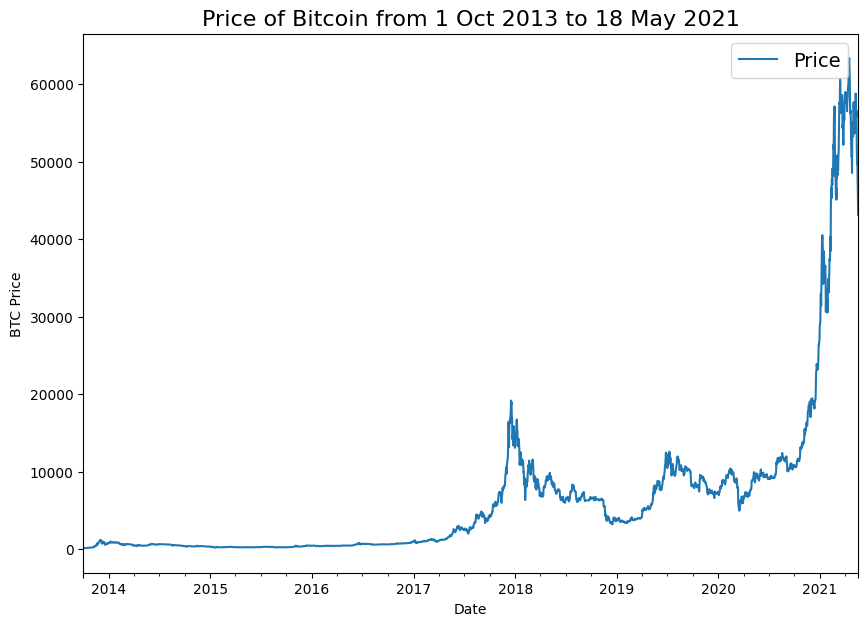

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

# Python'un CSV modülü ile zaman serisi verilerini içe aktarma

Zaman serisi verileriniz CSV formunda geliyorsa, mutlaka panda kullanmak zorunda değilsiniz.

Python'un yerleşik csv modülünü kullanabilirsiniz. Tarihlerle çalışıyorsanız, Python'un tarih saatini de kullanmak isteyebilirsiniz.
- https://docs.python.org/3/library/csv.html
- https://docs.python.org/3/library/datetime.html

Python'un csv ve datetime modüllerini kullanarak bu sefer hariç, daha önce oluşturduğumuz grafiği nasıl çoğaltabileceğimizi görelim.

📖 Kaynak: Python'un csv modülünü kullanma hakkında harika bir rehber için, Real Python'un Python'da CSV dosyalarını Okuma ve Yazma eğitimine göz atın.

 https://realpython.com/python-csv/

timestemps --> tarihleri saklar.

indirilen dosyanın dosya yolu copy/paste yap.

csv dosyasında bilgiler (sütunlar) arasında virgül var.


In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

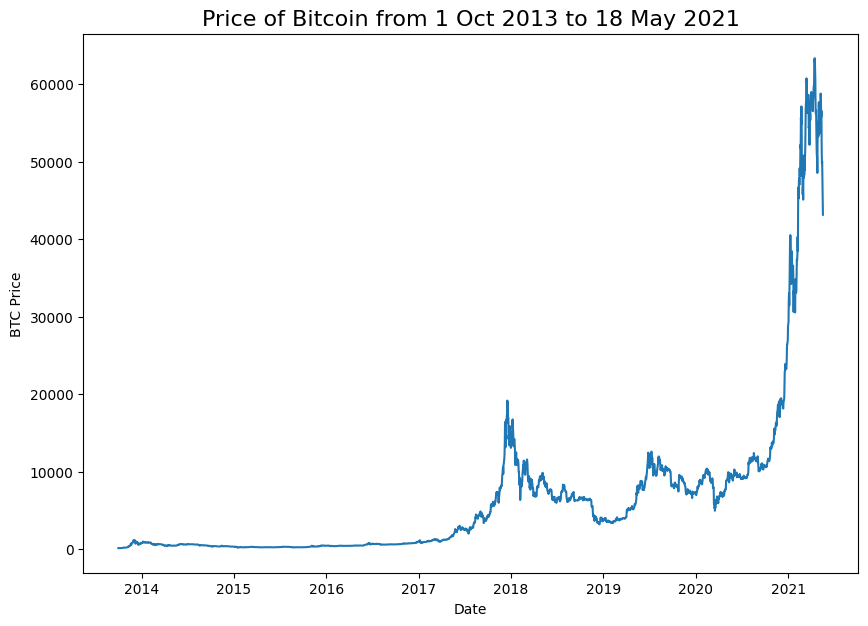

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

Tıpkı pandaların arsası gibi. Ve zaman adımlarını tarih zamanı nesneleri olarak biçimlendirdiğimiz için, matplotlib harika görünümlü bir tarih ekseni görüntüler.

# Verileri Biçimlendir Bölüm 1: Zaman serisi verileri için tren ve test setleri oluşturma

Tamam. Sırada ne var?

Bir model için verilerimizi hazırladığımızı tahmin etseydin, haklısın.

Herhangi bir makine öğrenimi veri kümesini hazırlamak için en önemli ilk adım nedir?

Ölçeklendirme?

Hayır...

Aykırıları kaldırmak mı?

Hayır...

Tren ve test bölmeleri oluşturmaya ne dersiniz?

Evet!

Genellikle, Scikit-Learn'in olağanüstü train_test_split() gibi bir işlevi kullanarak bir tren ve test bölmesi oluşturabilirsiniz, ancak birazdan göreceğimiz gibi, bu zaman serisi verileri için gerçekten kesmez. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Ancak bölünmeler oluşturmadan önce, ne tür verilere sahip olduğumuz hakkında konuşmaya değer.

Zaman serisi problemlerinde, tek değişkenli veya çok değişkenli verilere sahip olacaksınız.

Verilerimizin ne olduğunu tahmin edebilir misiniz?

- Tek değişkenli zaman serisi verileri, örneğin Bitcoin'in fiyatını tahmin etmek için Bitcoin fiyatını kullanmak gibi bir değişkenle ilgilenir.

- Çok değişkenli zaman serisi verileri, örneğin haftanın gününü, yılın saatini ve bir bölgedeki ev sayısını kullanarak elektrik talebini tahmin etmek gibi birden fazla değişkenle ilgilenir.

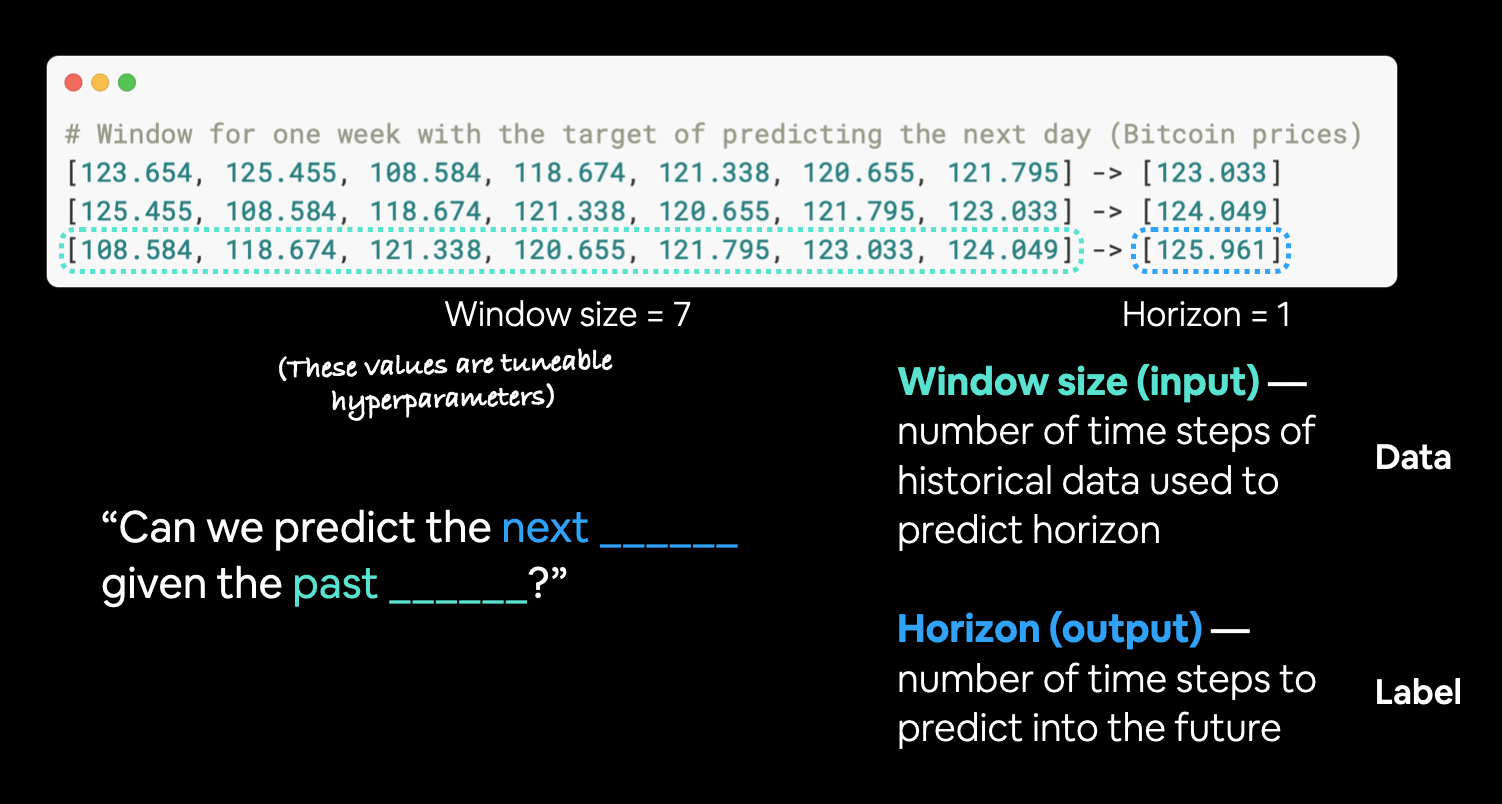

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-time-series-windows-and-horizons.png"

# Resmi göster
display(Image(image_url))


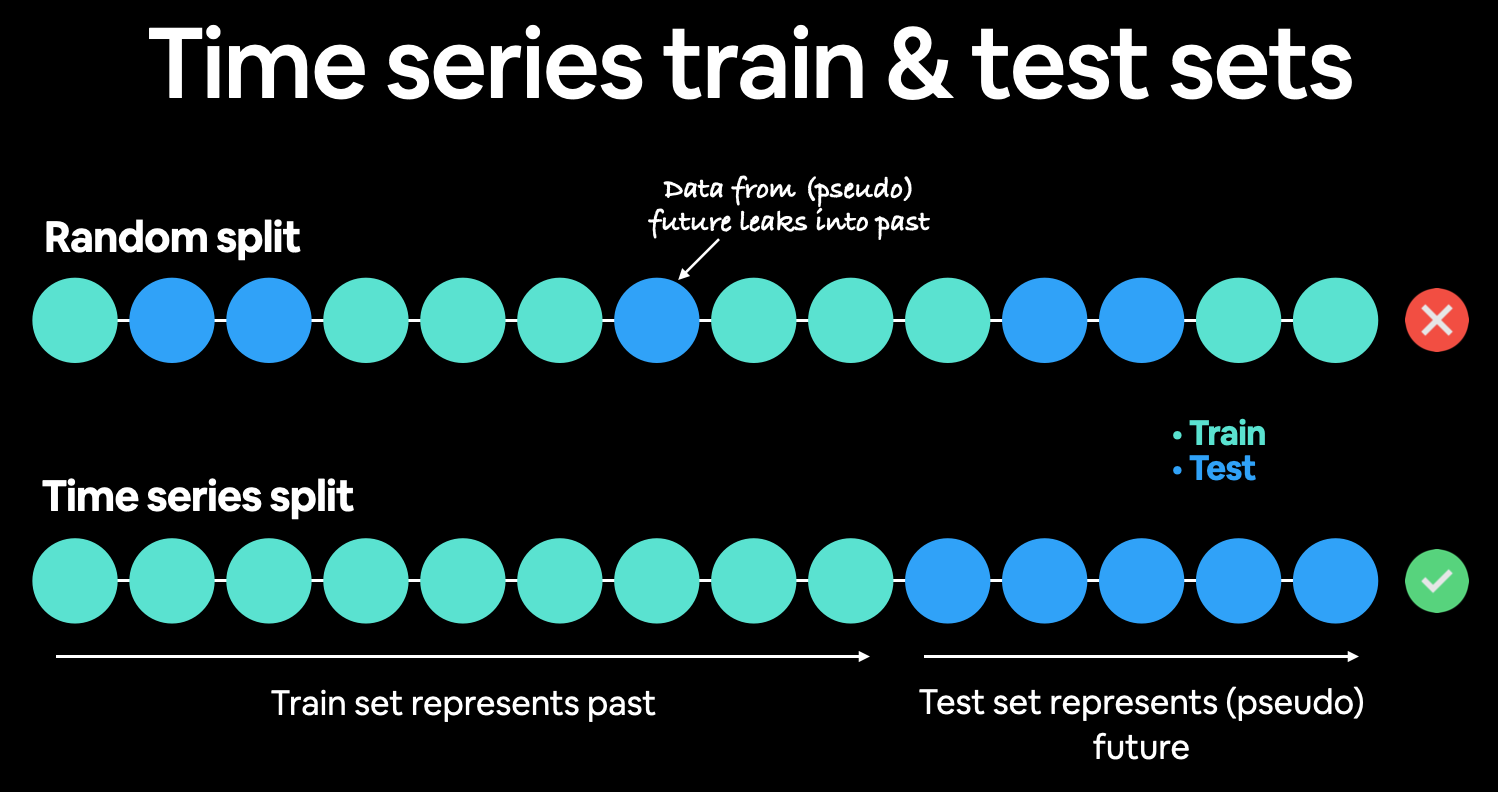

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-time-series-train-test-split.png"

# Resmi göster
display(Image(image_url))


# Zaman serileri için trainn ve test setleri oluşturun (yanlış yol)

Tamam, tek değişkenli bir zaman serisiyle uğraştığımızı anladık, bu yüzden yalnızca bir değişken üzerinde bir bölme yapmamız gerekiyor (çok değişkenli zaman serileri için birden fazla değişkeni bölmeniz gerekecek).

Zaman serisi verilerini bölmek için önce yanlış yolu görmeye ne dersiniz?

DataFrame dizinimizi ve sütunumuzu NumPy dizilerine dönüştürelim.

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

Ve şimdi tren ve test setlerimizi oluşturmak için Scikit-Learn'den her zaman sadık olan train_test_split'i kullanacağız.

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

Bölünmeler iyi çalıştı gibi görünüyor, ancak bir sayfadaki sayılara güvenmeyelim, görselleştirelim, görselleştirelim, görselleştirelim!

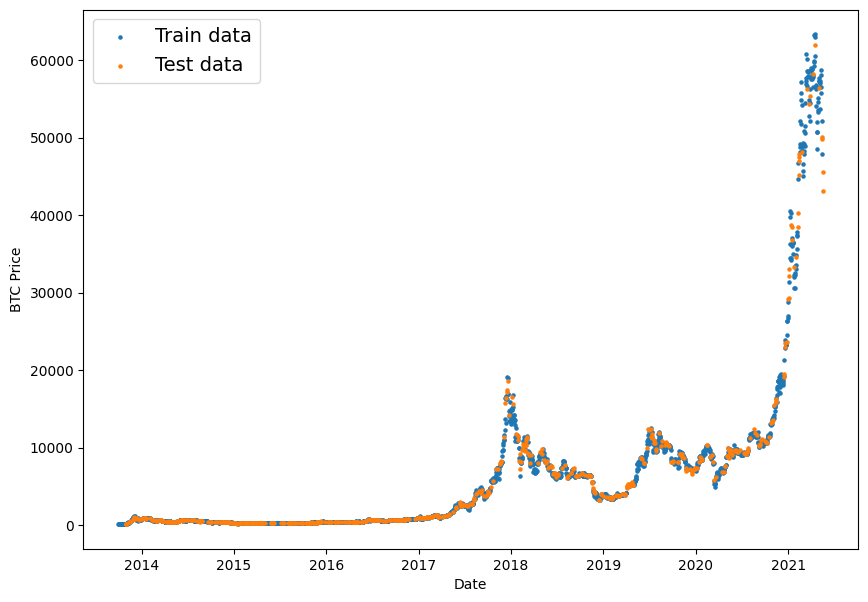

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Bu olay örgüsünün nesi var?

Peki, ne yapmaya çalıştığımızı kendimize hatırlatalım.

Bitcoin'in gelecekteki fiyatlarını tahmin etmek için Bitcoin'in tarihsel fiyatını kullanmaya çalışıyoruz.

Bunu akılda tutarak, görülen verilerimiz (eğitim seti) nedir?

Geçmişte Bitcoin fiyatları.

Ve görünmeyen verilerimiz (test seti)?

Gelecekte Bitcoin fiyatları.

Yukarıdaki arsa bunu yansıtıyor mu?

Hayır.

Test verilerimiz eğitim verilerinin tamamına dağılmış durumdadır.

Bu tür rastgele bölünme, zaman bileşeni olmayan veri kümeleri için uygundur (sınıflandırma problemleri için metin görüntüleri veya pasajları gibi) ancak zaman serisi için zaman faktörünü hesaba katmalıyız.

Bunu düzeltmek için, verilerimizi gerçekte ne yapmaya çalıştığımızı yansıtacak şekilde bölmeliyiz.

Geçmişi yansıtan bir veri kümesine (tren seti) ve geleceği yansıtan bir veri kümesine (test seti) sahip olmak için geçmiş Bitcoin verilerimizi bölmemiz gerekiyor.

test setinin geleceği temsil etmesi gerekir.

x: eğitim, y: test

random split --> xyyxxxyxxxyxyyxyy

time series split --> xxxxxxxxyyy

ikincisi doğru.

Rastgele bölünmede geçmişe sızan veriler var. Eğitim seti geçmişi, test seti sahteyi temsil eder. Aslında gelecekteki bir veri seti yapamayız ancak modelin gelecekte ne kadar iyi veri tahmin edeceğini simüle etmek için bu eğitim bölmesini yapmalıyız.




# Zaman serileri için tren ve test setleri oluşturun (doğru yol)

Tabii ki, gelecekten gelen verilere gerçekten erişmemizin bir yolu yok.

Ancak eğitim setine göre test setimizi gelecekte olacak şekilde tasarlayabiliriz.

Bunu yapmak için, verilerimizi bölmek için zaman içinde bir keyfi nokta oluşturabiliriz.

Zamandaki noktadan önceki her şey eğitim seti olarak kabul edilebilir ve zaman içindeki noktadan sonraki her şey test seti olarak kabul edilebilir.

* 90/10 veya 95/5 olarak da değiştirebilirsin.

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

Tamam, görünüşe göre özel yapım bölmelerimiz train_test_split ile yaptığımız bölmelerle aynı uzunluklarda.

Ama yine, bunlar bir sayfadaki rakamlar.

Ve deyimin nasıl gittiğini biliyorsun, bir göze iki kulaktan fazla güven.

Hadi görselleştirelim.

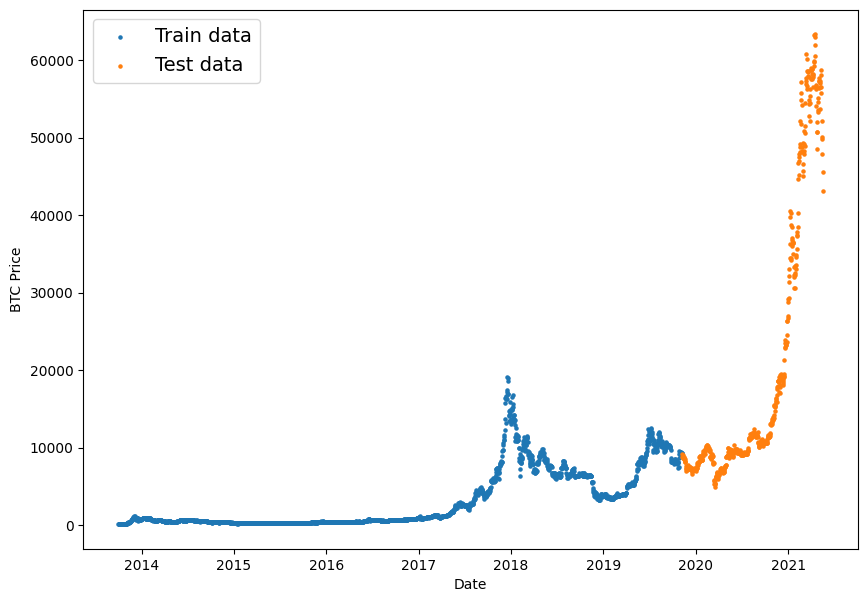

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Bu çok daha iyi görünüyor!

Burada ne olduğunu görüyor musun?

Test setindeki (gelecek) değerleri tahmin etmeye çalışmak için bir modeli eğitmek için eğitim setini (geçmiş) kullanacağız.

Test seti yapay bir gelecek olduğundan, modelimizin gerçek gelecek verileri üzerinde nasıl performans gösterebileceğini gösterebiliriz.

🔑 Not: Test setiniz için ayırdığınız veri miktarı taşa ayarlanmaz. 80/20, 90/10, 95/5 bölmeleriniz olabilir veya bazı durumlarda tren ve test setlerine bölmek için yeterli veriye bile sahip olmayabilirsiniz (aşağıdaki kaynağa bakın). Mesele, test setinin gerçek bir gelecek değil, sahte bir gelecek olduğunu hatırlamaktır, sadece size oluşturduğunuz modellerin nasıl performans gösterdiğine dair bir gösterge vermek içindir.

📖 Kaynak: Zaman serisi verileriyle çalışmak, diğer veri türlerine kıyasla zor olabilir. Ve bir test seti için ne kadar veri kullanılacağı gibi dikkat edilmesi gereken birkaç tuzak var. Deneyimli makine öğrenimi uygulayıcılarını şaşırtan zaman serisi tahmini hakkında 3 gerçek, zaman serisi verileriyle çalışırken dikkat edilmesi gereken farklı şeylerden bahsediyor, okumanızı tavsiye ederim. https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387

Bir çizim işlevi oluştur

Verileri sürekli olarak çizmek için matplotlib komutlarını yeniden yazmak yerine, daha sonra yeniden kullanabileceğimiz bir çizim işlevi yapalım.

def fonks. içine y_label..vs ekleyebilirdin daha geniş bir fonk. olurdu.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

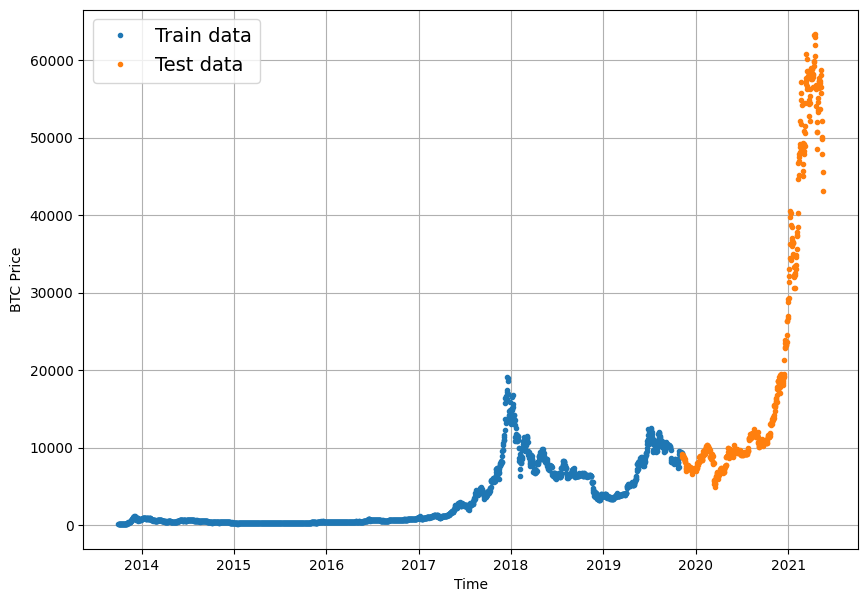

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelleme Deneyleri

Veri giriş ve çıkışları doğru biçimlendirildiği sürece sorunumuz için hemen hemen her türlü modeli oluşturabiliriz.

Bununla birlikte, hemen hemen her türlü modeli oluşturabilmemiz, iyi performans göstereceği/üretim ortamında kullanılması gerektiği anlamına gelmez.

Baştan sona modeller oluştururken ve değerlendirirken bunun ne anlama geldiğini göreceğiz.

Hangi modelleme deneylerini çalıştıracağımızı tartışmadan önce, aşina olmanız gereken iki terim vardır, ufuk ve pencere.

- Horizon = geleceğe tahmin etmek için zaman adımlarının sayısı

- Window = ufku tahmin etmek için kullanılan geçmişten gelen zaman adımlarının sayısı

Örneğin, önceki haftanın Bitcoin fiyatlarını (geçmişte 7 gün) kullanarak yarın için Bitcoin fiyatını (gelecekte 1 gün) tahmin etmek isteseydik, horizon 1 ve window_size 7 olurdu.

Şimdi, bu modelleme deneylerine ne dersiniz?

# Model 0: Naive tahmin (taban çizgisi)

Her zamanki gibi, bir temel ile başlayalım.

Zaman serisi tahmini için en yaygın temel modellerden biri olan naif model (naif tahmin olarak da adlandırılır), hiç eğitim gerektirmez. https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method

Bunun nedeni, tüm naif modelin bir sonraki zaman adımı değerini tahmin etmek için önceki zaman adımı değerini kullanmasıdır.

Formül şöyle görünüyor:

yt' = yt - 1

Zaman adımı t'deki (y-şapka) tahmin, zaman adımı t-1'deki (önceki zaman adımı) değere eşittir.

Kulağa basit geliyor mu?

Belki değil.

Açık bir sistemde (borsa veya kripto piyasası gibi), genellikle herhangi bir modelle naif tahmini yenmenin oldukça zor olduğunu göreceksiniz.

🔑 Not: Bu dizüstü bilgisayar uğruna, açık bir sistem, bir piyasa (hisse senedi veya kripto) gibi giriş ve çıktıların serbestçe akabileceği bir sistemdir. Kapalı bir sistem olarak, girişler ve çıkışlar sistem içinde bulunur (arkadaşlarınızla bir poker oyunu gibi, satın almayı bilirsiniz ve kazananın ne kadar alabileceğini bilirsiniz). Açık sistemlerde zaman serisi tahmini genellikle oldukça zayıftır.

bir dahaki sefere önceki zaman adımını körü körüne tahmin ediyor.

y(t) = y(t-1)

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

X_test[1:] demezsen hata alırsın. Yukarıda naive modelde bir öncekini aldığını gördün. Y'de görünecek son değişkene sahip değiliz. X testi birebir dengelenmeli. İlk indeks ve sonrasoı dahil olmak üzere ilk indeksten sonra her şeyi almalıyız.

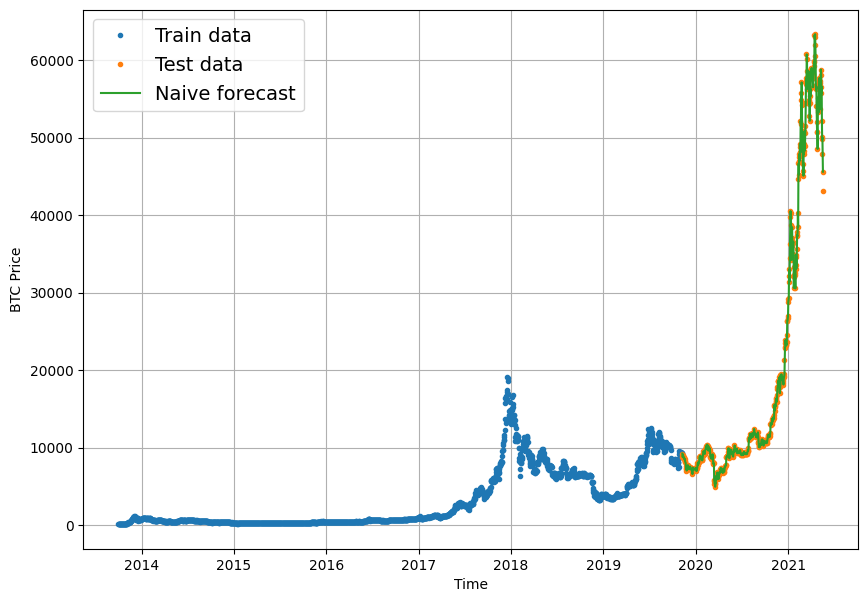

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

Naif tahmin, verileri iyi takip ediyor gibi görünüyor.

Daha iyi bakmak için yakınlaştıralım.

Bunu bir ofset değeri oluşturarak ve bunu plot_time_series() işlevimizin start parametresine geçirerek yapabiliriz.

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

Yakınlaştırdığımızda, naif tahminin test verilerinden biraz sonra geldiğini görüyoruz. Bu mantıklı çünkü naif tahmin, bir sonraki zaman adımı değerini tahmin etmek için önceki zaman adımı değerini kullanır.

Tahmin yapıldı. Değerlendirme zamanı.

# Bir zaman serisi modelini değerlendirmek

Zaman serisi tahmini genellikle bir sayıyı tahmin etmeyi içerir (bizim durumumuzda, Bitcoin'in fiyatı).

Ve bir sayıyı tahmin etmek ne tür bir sorundur?

Regresyon dediyseniz on puan.

Bilinen bu ile, zaman serisi tahminlerimizi değerlendirmek için regresyon değerlendirme metriklerini kullanabiliriz.

Değerlendireceğimiz ana şey şudur: modelimizin tahminleri (y_pred) gerçek değerlerle (y_true veya ground truth değerleri) nasıl karşılaştırılır?

📖 Kaynak: Farklı modelimizin zaman serisi tahmin doğruluğunu değerlendirmek için birkaç metrik kullanacağız. Birçoğu Tahmin: İlkeler ve Uygulama bölüm 5.8'de matematiksel ve kavramsal olarak kaynaklanmış ve açıklanmıştır, ne uygulayacağımıza dair daha derinlemesine bir genel bakış için burayı okumanızı tavsiye ederim.

Aşağıdaki metriklerin tümü için daha düşük daha iyidir (örneğin 0'lık bir MAE, MAE 100'den daha iyidir).

https://otexts.com/fpp3/accuracy.html

# Ölçeke bağlı hatalar

Bunlar, zaman serisi değerlerini ve aynı ölçekteki tahminleri karşılaştırmak için kullanılabilecek metriklerdir.

Örneğin, USD cinsinden Bitcoin geçmiş fiyatları veresus Bitcoin tahmin değerleri USD cinsinden.

MAE (mutlak hata anlamına gelir) Yorumlanması kolay (bir tahmin, gerçek miktardan farklı X miktarıdır). MAE'yi en aza indiren tahmin yöntemleri, medyanın tahminlerine yol açacaktır. tf.keras.metrics.mean_absolute_error() https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError

RMSE (kök ortalama kare hatası) RMSE'yi en aza indiren tahminler, ortalama tahminlere yol açar. tf.sqrt(tf.keras.metrics.mean_square_error()) https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError

# Yüzde hataları

Yüzde hatalarının birimleri yoktur, bu da farklı veri kümelerindeki tahminleri karşılaştırmak için kullanılabilecekleri anlamına gelir.

Metrik Ayrıntılar Kodu

MAPE (ortalama mutlak yüzde hatası) En yaygın kullanılan yüzde hatası. Y=0. tf.keras.metrics.mean_absolute_percentage_error() patlayabilir (işe yaramaz) https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE

sMAPE (simetrik ortalama mutlak yüzde hatası) Tahmin: İlkeler ve Uygulama tarafından kullanılmaması önerilir, ancak tahmin yarışmalarında kullanılır. Özel uygulama https://otexts.com/fpp3/accuracy.html#percentage-errors

# Ölçekli hatalar

Ölçekli hatalar, farklı zaman serilerindeki tahmin performansını karşılaştırırken yüzde hatalarına bir alternatiftir.

Metrik Ayrıntılar Kodu

MASE (ortalama mutlak ölçekli hata). MASE, naif tahmin için bire eşittir (veya bire çok yakın). Naiflerden daha iyi performans gösteren bir tahmin <1 MASE almalıdır.
- mase_loss() https://github.com/sktime/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16

🤔 Soru: O kadar çok metrik var ki... hangisine en çok dikkat etmeliyim? Sorununuza bağlı olacak. Bununla birlikte, yorumlama kolaylığı olduğu için (bunu büyükannenize bir cümleyle açıklayabilirsiniz), MAE genellikle başlamak için çok iyi bir yerdir.

Birçok modeli değerlendireceğimiz için, tahminleri üzerindeki değerlendirme metriklerini hesaplamamıza yardımcı olacak bir işlev yazalım.

Önce TensorFlow'a ihtiyacımız olacak.

In [ ]:
# Let's get TensorFlow!
import tensorflow as tf

Ve TensorFlow, MASE'nin hazır bir sürümüne sahip olmadığından (aboslute ölçekli hata anlamına gelir), kendimizinkini yaratmaya ne dersiniz?

MASE'yi hesaplayan sktime'ın (zaman serileri için Scikit-Learn) MeanAbsoluteScaledError sınıfından ilham alacağız. https://github.com/sktime/sktime

istatistikel formülüne bakarak aşağıdaki formülü yazmış. Bu formülü incele.

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

Yukarıdaki MASE sürümünün sktime'ın mae_loss()'i gibi eğitim değerlerini almadığını fark edeceksiniz. Bizim durumumuzda, test hakkındaki tahminlerimizin MAE'sini, test setindeki naif tahminin MAE'si ile karşılaştırıyoruz.

Uygulamada, işlevi doğru bir şekilde oluşturduysak, naif model 1'lik (veya 1'e çok yakın) bir MASE elde etmelidir. Naif tahminden daha kötü olan herhangi bir model >1 MASE'ye ulaşacak ve naif tahminden daha iyi herhangi bir model <1 MASE'ye ulaşacaktır.

Farklı değerlendirme metriklerimizin her birini bir işlevde bir araya getirelim.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Pekala, görünüşe göre yenmemiz gereken bazı temeller var.

Naif tahminin MAE'sine bir göz atarsak, ortalama olarak her tahmin gerçek Bitcoin fiyatından ~567 dolar farklı görünüyor.

Bu, test veri setindeki Bitcoin'in ortalama fiyatıyla nasıl karşılaştırılır?

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

Tamam, bu iki değere bakmak bize modelimizin nasıl performans gösterdiği hakkında bir fikir vermeye başlıyor:

- Test veri kümesindeki Bitcoin'in ortalama fiyatı: 20.056 $'dır (not: en yüksek fiyat bu değerin 3 katının üzerinde ve en düşük fiyat 4 kat daha düşük olduğu için ortalama burada en iyi ölçü olmayabilir)

- Naif tahmindeki her tahmin ortalama olarak şu fiyata göre: 567$

Bu iyi bir model olduğunu söylemek için yeterli mi?

Bu senin kendi yorumun. Şahsen, işarete daha yakın bir modeli tercih ederim.

Bir tane inşa etmeye ne dersin?

# Temel çizgiler ve gerçek tahminler için kullanılabilecek diğer zaman serisi tahmin modelleri türleri

Çalışmak için naif bir tahmin taban çizgimiz olduğundan, denemek ve yenmek için modeller oluşturmaya başlamanın zamanı geldi.

Ve bu kurs TensorFlow ve derin öğrenmeye odaklandığından, saf tahmin sonuçlarımızı denemek ve geliştirmek için derin öğrenme modelleri oluşturmak için TensorFlow'u kullanacağız.

Bununla birlikte, temeller/performans tahminleri oluşturmak için bakmak isteyebileceğiniz başka birçok model türü vardır.

Hatta bazıları bu dizüstü bilgisayardaki en iyi performans gösteren modellerimizi bile geçebilir, ancak onları müfredat dışı için denemeyi bırakacağım.

Bazı kütüphaneler;

- Moving average	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
- ARIMA (Autoregression Integrated Moving Average)	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- sktime (Scikit-Learn for time series)	https://github.com/alan-turing-institute/sktime
- TensorFlow Decision Forests (random forest, gradient boosting trees)	https://www.tensorflow.org/decision_forests
- Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats
- LinkedIn Greykite (flexible, intuitive and fast forecasts)	https://github.com/linkedin/greykite

# Veri Bölüm 2'yi Biçimlendir: Veri kümesini pencereleme

Elbette şimdiye kadar modeller oluşturmaya başlamaya hazır olur muyduk?

Çok yakınız! Sadece bir adım daha (gerçekten iki) gitmek için.

Zaman serilerimizi pencereye açmalıyız.

Neden pencere yapıyoruz?

Pencereleme, bir zaman serisi veri kümesini denetimli öğrenme problemine dönüştürmek için bir yöntemdir.

Başka bir deyişle, geleceği tahmin etmek için geçmişin pencerelerini kullanmak istiyoruz.

Örneğin, tek değişkenli bir zaman serisi için, bir sonraki tek değeri (ufuk=1) tahmin etmek için bir hafta (pencere=7) pencere açma şöyle görünebilir:

Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

Or for the price of Bitcoin, it'd look like:

Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]

[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]

[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]


Tek değişkenli bir zaman serisi alan ve bunu belirtilen boyutlarda pencerelere ve ufuklara dönüştüren bazı işlevler oluşturalım.

Varsayılan ufuk boyutu 1 ve pencere boyutu 7 ile başlayacağız (bunlar mutlaka kullanılacak en iyi değerler değil, onları yeni seçtim).

Aslında horizon: Bir günlük sıradaki değeri tahmin etme ve pencere boyutu: tahmin etmek için geçmiş haftanın bitcoin değerini kullanmaktır.

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-nbeats-architecture-double-residual-stacking.png"

# Resmi göster
display(Image(image_url))

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

Şimdi bir diziyi almak için bir işlev yazacağız ve onu bir pencereye ve ufka dönüştüreceğiz.

Çıktı tupple formatındadır.

-horizon aslında 6 oluyor burada.

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Şimdi tüm bir zaman serisi için pencereler yapmanın bir yoluna ihtiyacımız var.

Bunu döngüler için Python ile yapabiliriz, ancak büyük zaman serileri için bu oldukça yavaş olur.

İşleri hızlandırmak için NumPy'nin dizi indekslemesinden yararlanacağız. https://numpy.org/doc/stable/reference/arrays.indexing.html

Bir işlev yazalım:

- Belirli bir pencere boyutunda bir pencere adımı oluşturur, örneğin: [[0, 1, 2, 3, 4, 5, 6, 7]]

- Birden fazla pencere adımının 2D'sini oluşturmak için NumPy indekslemeyi kullanır, örneğin:

[[0, 1, 2, 3, 4, 5, 6, 7],

[1, 2, 3, 4, 5, 6, 7, 8],

[2, 3, 4, 5, 6, 7, 8, 9]]

- Bir hedef seriyi dizine eklemek için çoklu pencere adımlarının 2D dizisini kullanır

- Pencere adımlarını belirtilen ufka sahip pencerelere dönüştürmek için yukarıda oluşturduğumuz get_labelled_windows() işlevini kullanır

📖 Kaynak: Aşağıda oluşturulan işlev, Syafiq Kamarul Azman'ın NumPy ile Hızlı ve Sağlam Sürgülü Pencere Vektörleştirme makalesinden uyarlanmıştır. https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

- np.arange ile pencere boyutu artışından bir değer aralığı oluşturulur. np.arange(8) --> ([0,1,2,...,7])
- np.expand_dims(np.arange(8), axis=0) --> ([[1,2,...,7]])

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


🔑 Not: Yukarıda uyguladıklarımıza benzer sonuçlar elde eden bir işlevi tf.keras.preprocessing.timeseries_dataset_from_array() adresinde bulabilirsiniz. Tıpkı bizimki gibi, bir dizi alır ve pencereli bir veri kümesi döndürür. Verileri tf.data.Dataset örneği biçiminde döndürme avantajına sahiptir (bunu kendi verilerimizle nasıl yapacağımızı daha sonra göreceğiz). https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

# Pencereleri eğitim ve test setlerine dönüştürmek

Bak o pencereler ne kadar iyi görünüyor! Neredeyse Sistine Şapeli'ndeki vitray pencereler gibi, belki o kadar iyi değil ama yine de.

Pencerelerimizi eğitime ve test bölmelerine dönüştürme zamanı.

Mevcut eğitim ve test bölmelerimizi pencereleyebilirdik, ancak pencerelemenin doğası gereği (pencereleme genellikle verilerin bir noktasında bir ofset gerektirir), genellikle önce verileri pencerelemek, ardından eğitim ve test setlerine bölmek daha iyi çalışır.

Tüm pencere setlerini ve etiketlerini alan ve bunları eğitim ve test bölmelerine ayıran bir işlev yazalım.

Bu değeri bir fonk.a bağlamak önemli. değişken değerlerde oran değişmeyecektir.

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

%80 eğitim verisi ve %20 test verisinin varsayılan bölünmesine dikkat edin (gerekirse bu bölme ayarlanabilir).

Eğitim pencerelerinin ve etiketlerinin ilk 5 örneği nasıl görünüyor?

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

train_labels[:5].shape --> (5,1)

np.sequeeze(train_labels[:5]).shape --> (5,)

Eğitim sırasında en iyi modeli kaydetmek için bir modelleme kontrol noktası oluşturmalıyız.



# Bir modelleme kontrol noktası yapın

Model oluşturmaya çok yakınız. Çok çok çok yakın.

Modelimizin performansı deneyden deneye dalgalanacağından, elmaları elmalarla karşılaştırdığımızdan emin olmak isteyeceğiz.

Bununla demek istediğim, adil bir karşılaştırma için, her modelin en iyi performansını her modelin en iyi performansıyla karşılaştırmak istiyoruz.

Örneğin, model_1 epoch 55'te inanılmaz derecede iyi performans gösterdiyse ancak performansı epoch 100'e düştüyse, modelin epoch 55'teki versiyonunun, modelin epoch 100'deki versiyonundan ziyade diğer modellerle karşılaştırılmasını istiyoruz.

Aynı şey diğer modellerimizin her biri için de geçerli: en iyisini en iyiyle karşılaştırın.

Bunu ele almak için, bir ModelCheckpoint geri araması uygulayacağız.

ModelCheckpoint geri araması, eğitim sırasında modelimizin performansını izleyecek ve save_best_only=True ayarını yaparak en iyi modeli dosyaya kaydedecektir.

Bu şekilde modelimizi değerlendirirken en iyi performans gösteren yapılandırmasını dosyadan geri yükleyebiliriz.

🔑 Not: Veri kümesinin boyutu nedeniyle (normalden daha küçük), modelleme deney sonuçlarımızın eğitim sırasında oldukça dalgalandığını fark edeceksiniz (bu nedenle en iyi modeli kaydetmek için ModelCheckpoint geri aramasının uygulanması).

Birden fazla deney yapacağımız için, modelleri farklı adlar altında dosyaya kaydederek onları takip etmek mantıklıdır.

Bunu yapmak için, bir modeli belirtilen dosya adına kaydeden bir ModelCheckpoint geri araması oluşturmak için küçük bir işlev yazacağız. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

filepath ile model_experiments isimli bir klasör colab'ta oluşturulur.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1: Yoğun model (pencere = 7, ufuk = 1)

Modellerimizden birini inşa etme zamanı.

Buraya gelmeden önce biraz ön işlemden geçtiğimizi düşünüyorsanız, haklısınız.

Genellikle, bir model için veri hazırlamak, herhangi bir makine öğrenimi projesinin en büyük parçalarından biridir.

Ve iyi bir modele sahip olduğunuzda, muhtemelen verileri manipüle etmekten (örneğin daha fazlasını toplamak, kaliteyi iyileştirmek) modeli manipüle etmekten çok daha fazla gelişme olduğunu fark edeceksiniz.

Basit tutarak başlayacağız, model_1 sahip olacak:

- 128 gizli birim ve ReLU (düzeltilmiş doğrusal birim) aktivasyonu ile tek bir yoğun katman

- Doğrusal aktivasyonlu (veya aktivasyonsuz) bir çıkış katmanı

- Adam optimize edici ve MAE kayıp fonksiyonu

- 128'lik seri boyutu

- 100 dönem

Neden bu değerler?

Onları deneyden seçtim.

32'lik bir parti boyutu da oldukça iyi çalışıyor ve her zaman daha az dönem için eğitebiliriz, ancak model çok hızlı çalıştığından (bir saniye içinde göreceksiniz, çünkü sahip olduğumuz numune sayısı çok büyük değil) daha fazlası için eğitebiliriz.

🔑 Not: Her zaman olduğu gibi, makine öğrenimi problemleri için değerlerin çoğu deneyseldir. Bir makine öğrenme algoritmasında kendiniz ayarlayabileceğiniz değerlere (gizli birimler, toplu iş boyutu, ufuk boyutu, pencere boyutu) hiperparametreler denir. Ve hiperparametreler için en iyi değerleri bulmak için denemelere hiperparametre ayarlaması denir. Bir modelin kendisi tarafından öğrenilen parametreler olarak (verilerdeki desenler, resmi olarak ağırlıklar ve önyargılar olarak adlandırılır) parametreler olarak adlandırılır. https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning

TensorFlow'u içe aktaralım ve zaman serileri için ilk derin öğrenme modelimizi oluşturalım.

sigmoid ve softmax'tan dolayı lineer ve aktivasyon olmayan seçildi. Bir sayı tahmin ettiğin için herhangi bir aktivasyona ihtiyacın yok.

MAE loss --> cross entropy ikili kategori değerlendirmesinde vardı, ancak bir sayı tahmin ettiğimiz için regresyon değerlendirme metriği kullanılmalı.

Veri kümesi küçük olduğu için 100 epoch çok zaman almaz.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
18/18 [==============================] - 1s 33ms/step - loss: 1326.0063 - mae: 1326.0063 - val_loss: 2268.6897 - val_mae: 2268.6897
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 355.3766 - mae: 355.3766 - val_loss: 1841.2849 - val_mae: 1841.2849
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 224.2472 - mae: 224.2472 - val_loss: 1302.4305 - val_mae: 1302.4305
Epoch 4/100
18/18 [==============================] - 1s 44ms/step - loss: 196.0430 - mae: 196.0430 - val_loss: 1092.0878 - val_mae: 1092.0878
Epoch 5/100
18/18 [==============================] - 0s 27ms/step - loss: 184.5243 - mae: 184.5243 - val_loss: 995.0870 - val_mae: 995.0870
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 182.8110 - mae: 182.8110 - val_loss: 945.3299 - val_mae: 945.3299
Epoch 7/100
18/18 [==============================] - 0s 25ms/step - loss: 165.1395 - mae: 165.1395 - val_loss: 929.9807 - val_mae: 929.9807
Epoch 8/10

Verilerimizin küçük boyutu nedeniyle (toplam 3000'den az örnek), model çok hızlı çalışır.

Bunu değerlendirelim.

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 678.6123 - mae: 678.6123


[678.6123046875, 678.6123046875]

mse, mae'den daha büyük çünkü hataların kareleri var.

Modelin son dönemle aynı val_loss'a (bu durumda bu MAE) ulaştığını fark edeceksiniz.

Ancak ModelCheckpoint geri aramasını kullanarak dosyaya kaydedilen model_1 sürümüne yüklersek, sonuçlarda bir iyileşme görmeliyiz.

Callback ile zaten en iyi model tespit edilirdi, hangi epoch'da olursa olsun. Burada da load kodunda ne yazarsan yaz zaten en iyi olan kaydedilir.

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.6447 - mae: 564.6447


[564.6447143554688, 564.6447143554688]

Çok daha iyi! Eğitim sırasında modelin dalgalanan performansı nedeniyle, en iyi performans gösteren modele geri yükleme, MAE'de oldukça büyük bir gelişmedir.

# Bir modelle tahminler yapmak (test veri kümesinde)

Bir model eğittik ve test verileri üzerinde değerlendirdik, ancak üzerinde çalıştığımız projenin adı BitPredict 💰📈, bu yüzden tahminlerde bulunmak için modelimizi nasıl kullanabileceğimizi düşünüyorsunuz?

Daha fazla modelleme deneyi yapacağımıza göre, bir işlev yazalım:

1. Eğitimli bir model alır (tıpkı model_1 gibi)

2. Bazı giriş verilerini alır (tıpkı modelin eğitildiği veriler gibi)

3. Giriş verilerini modelin tahmin() yöntemine iletir

4. Tahminleri döndürür

Test setini ayırırken random şeklinde bölemezsin, burada bir sonraki zaman damgasının önceki zaman adımı olduğunu unutma. Bir tahmini bir önceki değer etkiler. Dolayısıyla karışık yaparsan sıkıntı.

Test veri setinin gerçek tahminler olmadığını unutma. Doğru tahminleri gelecekte yapmaya çalış. Burada test seti sadece geleceğin sözde bir temsilidir.

Bir model yalnızca benzer veriler, benzer biçimlendirilmiş veriler üzerinde gerçekten tahminlerde bulunabilir.

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions


In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8831.793, 8761.101, 8996.906, 8753.96 , 8753.899, 8699.593,
        8673.966, 8506.895, 8441.567, 8509.056], dtype=float32)>)

🔑 Not: Bu çıktılarla modelimiz henüz tahminde bulunmuyor. Sadece test veri kümesinde tahminlerde bulunmaktır. Tahmin, geleceğe yönelik tahminlerde bulunan bir model içerecektir, ancak test veri kümesi yalnızca sahte bir gelecektir.

Mükemmel! Şimdi bazı tahmin değerlerimiz var, daha önce oluşturduğumuz evaluate_preds()'i temel gerçekle karşılaştırmak için kullanalım.

test_labels.shape --> (556,1)

tf.squeeze(test_labels).shape --> [556]

model_1_preds.shape --> [556]



In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 564.6448,
 'mse': 1152069.1,
 'rmse': 1073.3448,
 'mape': 2.5443797,
 'mase': 0.99192446}

Modelimiz nasıl gitti? Saf tahmini geçti mi?

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Naif modelimiz neredeyse her metrikte ilk derin modelimizi yeniyor gibi görünüyor.

Bu, naif modelin gücünü ve herhangi bir makine öğrenimi projesi için bir temele sahip olmanın nedenini gösterir.

Ve elbette, sonuçları görselleştirmeden hiçbir değerlendirme tamamlanmazdı.

Model_1_preds'i test verilerine karşı çizmek için plot_time_series() işlevini kullanalım.

-len(test_windows) --> X testine indeksleme yapıldığı yer

Boyutsallık nedeniyle windows'u çizemiyorken çizim yapmak için X testini kullandık çünkü X testinin doğru dizinlerini aldığından emin oluruz.

### Kodlar üzerinde deneme yaparak neden -len... yaptığını anlamaya çalış.

value --> Hangi değerleri aldığına dikkat!

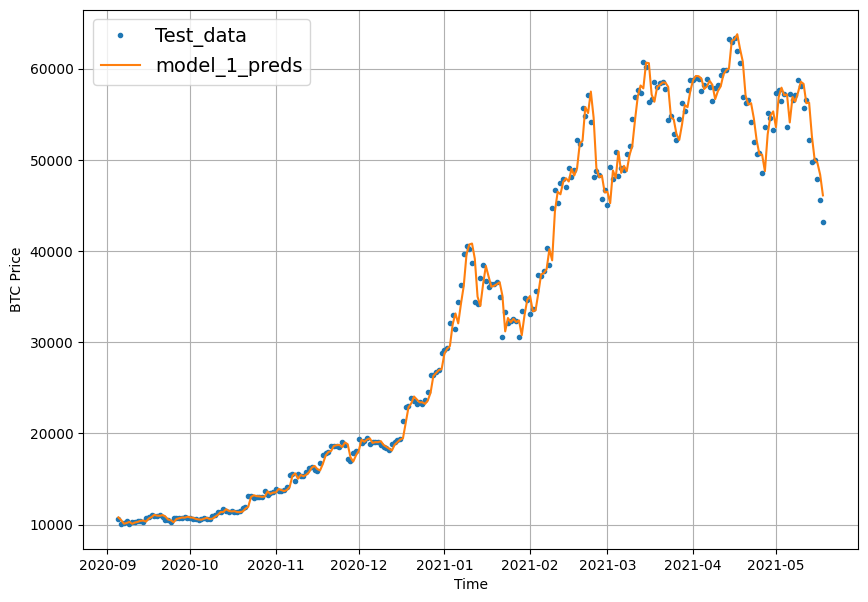

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

Bu tahminlerin nesi var?

Daha önce de belirtildiği gibi, test veri kümesindeler. Yani bunlar gerçek tahminler değil.

Mevcut model kurulumumuzla, gelecek için nasıl tahminler yapacağımızı düşünüyorsunuz?

Şimdilik bir düşünün, bunu daha sonra ele alacağız.

# Model 2: Yoğun (pencere = 30, ufuk = 1)

Naif bir model şu anda el yapımı derin öğrenme modelimizi yeniyor.

Bunun olmasına izin veremeyiz.

Modelleme deneylerimize devam edelim.

Önceki model mimarisini koruyacağız, ancak 30'luk bir pencere boyutu kullanacağız.

Başka bir deyişle, ertesi gün fiyatını tahmin etmek için önceki 30 günlük Bitcoin fiyatlarını kullanacağız.

🔑 Not: Daha önce hatırlayın, pencere boyutu (bir tahmini beslemek için kaç zaman adımı kullanılacak) ve ufk (geleceğe yönelik kaç zaman adımı tahmin etmek için) hiperparametrelerdir. Bu, değerleri bulmak için onları ayarlayabileceğiniz anlamına gelir ve daha iyi performansla sonuçlanacaktır.

İkinci modelleme deneyimize, daha önce oluşturduğumuz işlevleri kullanarak veri kümeleri hazırlayarak başlayacağız.

Ertesi günü tahmin etmek için 30 günlük geçmiş bitcoin değerleri kullanılır.

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

Veriler hazırlandı!

Şimdi model_2'yi, model_1 ile aynı mimariye ve aynı eğitim rutinine sahip bir model oluşturalım.

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 663.8672


663.8671875

ModelCheckpoint geri aramamız sayesinde dosyaya kaydedilen en iyi performans gösteren model_2'yi yüklemeyi denemeye ne dersiniz?

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.0249


586.02490234375

Mükemmel! En iyi performans gösteren modele geri yükleme, bir performans artışı görüyor.

Ama orada durmayalım, model_2 ile bazı tahminlerde bulunalım ve sonra daha önce yaptığımız gibi değerlendirelim.

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 586.0249,
 'mse': 1205173.0,
 'rmse': 1097.8037,
 'mape': 2.645588,
 'mase': 1.0243773}

Model_2, model_1'in yanı sıra naif modelden de daha kötü performans gösteriyor gibi görünüyor!

Bu, daha küçük bir pencere boyutunun daha iyi olduğu anlamına mı geliyor? (Bunu deneyebileceğiniz bir meydan okuma olarak bırakacağım)

Tahminler nasıl görünüyor?

grafiği yakınlaştırmak için offset 300 ayarladık.

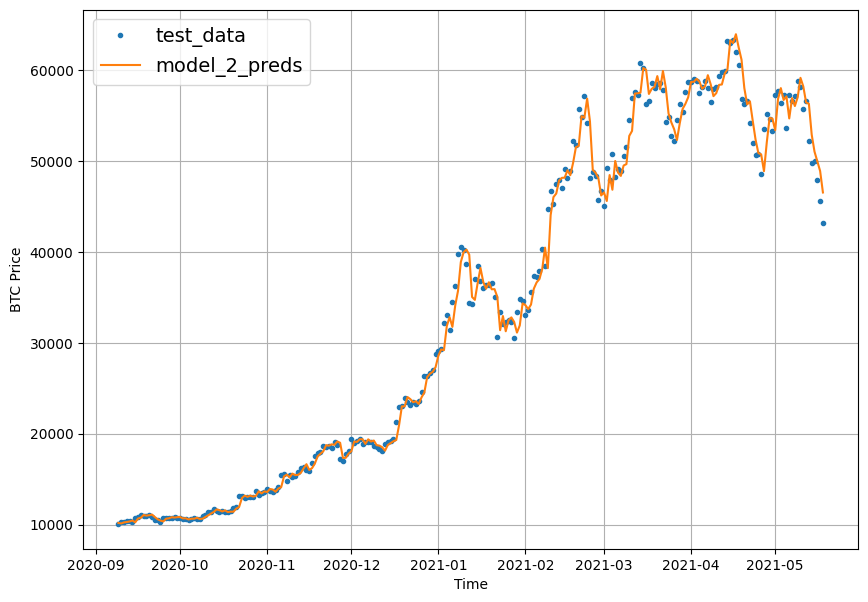

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


# Model 3: Yoğun (pencere = 30, ufuk = 7)

Önceki 30 gün göz önüne alındığında 7 gün önceden tahmin etmeye çalışalım.

İlk olarak, HORIZON ve WINDOW_SIZE değişkenlerini güncelleyeceğiz ve pencereli veriler oluşturacağız.

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

Ve tüm veri kümesi pencerelerini eğitim ve test setlerine ayıracağız.

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1399.5922


1399.5921630859375

Elmaları elmalarla karşılaştırmak için (en iyi performans gösteren model ile en iyi performans gösteren model), model_3'ün en iyi sürümünü yüklememiz gerekiyor

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1248.0610


1248.06103515625

Bu durumda, bir seferde 7 adım tahmin ettiğimiz için hata daha yüksek olacaktır.

Yine de bu mantıklı çünkü ne kadar çok dener ve tahmin ederseniz, hatanız o kadar büyük olur (hava durumunu 7 gün önceden tahmin etmeye çalışmayı düşünün).

Make_preds() işlevini kullanarak modelimizle tahminlerde bulunalım ve evaluate_preds() işlevini kullanarak değerlendirelim.

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9353.734, 9406.963, 9293.117, 9631.235, 9787.978, 9214.334,
        9457.023],
       [9045.917, 8968.145, 9061.97 , 9336.155, 9408.709, 9023.832,
        9186.824],
       [8865.259, 8914.537, 8945.468, 9292.221, 9069.26 , 9243.214,
        8940.479],
       [8920.247, 9191.205, 8889.991, 9492.62 , 9148.038, 9314.263,
        9038.617],
       [8982.248, 9149.592, 8826.757, 9404.007, 9084.265, 9146.171,
        9021.552]], dtype=float32)>

In [ ]:

# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  655.98285 ,   428.40652 ,   396.04047 ,   515.5456  ,
          533.45087 ,   510.29498 ,   573.5126  ,   575.2421  ,
          544.8004  ,   598.2998  ,   924.54584 ,   868.1768  ,
          960.82654 ,   950.1122  ,   600.7546  ,   281.72916 ,
          269.53168 ,   192.11998 ,   136.15617 ,   169.16393 ,
          232.38184 ,   233.81975 ,   381.36285 ,   417.25034 ,
          204.05518 ,   183.97203 ,   136.3923  ,   111.232704,
          199.24902 ,   201.81662 ,   249.98123 ,   381.27414 ,
          359.85385 ,   425.17508 ,   309.8099  ,   385.90543 ,
          362.2032  ,   272.55356 ,   254.69392 ,   230.6792  ,
          418.2193  ,   124.72496 ,   107.03962 ,    87.4474  ,
          156.71645 ,   136.15123 ,    71.81215 ,    89.31501 ,
          164.1693  ,   109.57331 ,   131.91727 ,   175.17355 ,
          195.85205 ,   171.71959 ,   273.69672 ,   360.6504  ,
          474.73383 ,   470.0457  ,   443.60226 ,   500.60666 ,
          312.68073 ,   209.1273 

# Değerlendirme fonksiyonumuzun daha büyük ufuklar için çalışmasını sağlayın

Model_3_results için çıktıların çok boyutlu olduğunu fark edeceksiniz.

Bunun nedeni, tahminlerin HORIZON zaman adımları boyunca değerlendirilmesidir (bir seferde 7 tahmin).

Bunu düzeltmek için, evaluate_preds() işlevimizi birden fazla veri şekliyle çalışacak şekilde ayarlayalım.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

Şimdi evaluate_preds()'i birden fazla şekille çalışacak şekilde güncelledik, nasıl görünüyor?

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1248.061,
 'mse': 5525047.0,
 'rmse': 1443.9373,
 'mape': 5.672965,
 'mase': 2.2208548}

Görselleştirme zamanı.

Tahmin değerlendirme metriklerimiz çok boyutlu olsaydı, onları çizersek tahminlerin nasıl görüneceğini düşünüyorsunuz?

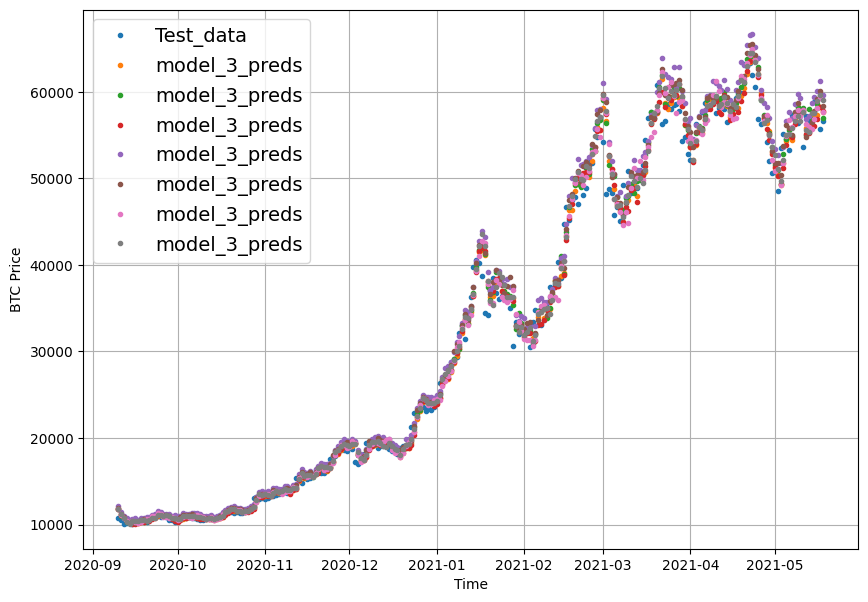

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


Çok ufuklu tahminlerimizi çizmeye çalıştığımızda, korkak görünümlü bir olay örgüsü elde ederiz.

Yine, modelimizin tahminlerini toplayarak bunu düzeltebiliriz.

🔑 Not: Tahminleri toplamak (örneğin, 7 günlük bir ufku ortalama gibi bir değere düşürmek) orijinal tahminden bilgi kaybeder. Olduğu gibi, model tahminleri 7-days için yapılmak üzere eğitildi, ancak bunları bire indirerek, bunları görsel olarak çizme yeteneği kazanıyoruz, ancak birden fazla gün boyunca içerdiği ekstra bilgileri kaybediyoruz.

Yukarıda 7 horizon için 7 değeri görüyorsun, çıktı şekli (5,7) idi. 7 farklı renkli noktayı tek -'ye eşitleyebiliriz.

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

# Modellerimizden hangisi şimdiye kadarki en iyi performansı gösteriyor?

Şimdiye kadar, aynı mimariyi kullanan ancak farklı veri girişleri kullanan 3 modeli eğittik.

Hangi modelin şimdiye kadar en iyi performans gösterdiğini görmek için onları naif modelle karşılaştıralım.

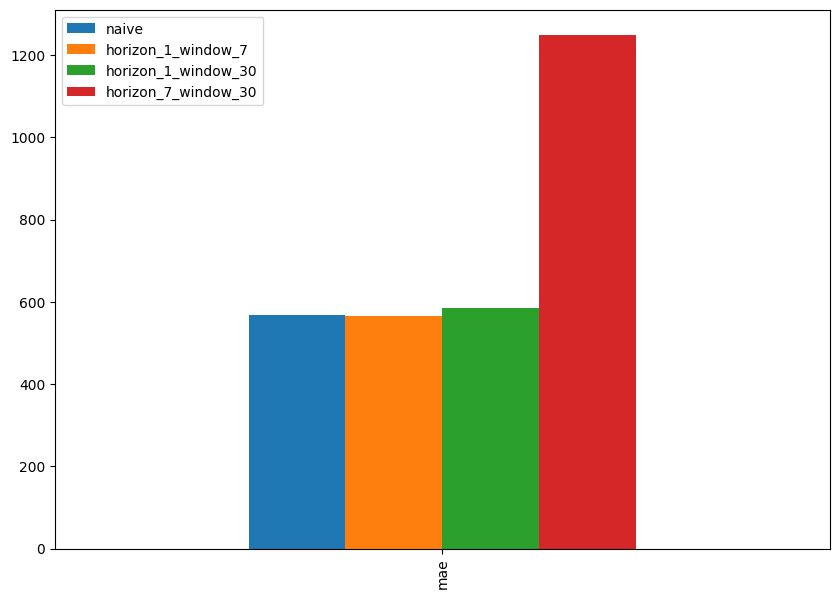

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Woah, naif modelimiz en iyi performansı gösteriyor (açık sistemlerde naif bir modeli yenmek çok zor) ama 1 ufklu ve 7 pencere boyutuna sahip yoğun model en yakın performans gösteriyor.

Bu nedenle, bir sonraki modelleme deneyleri serimiz için HORIZON=1 ve WINDOW_SIZE=7 kullanalım (başka bir deyişle, ertesi günü denemek ve tahmin etmek için Bitcoin fiyatlarının önceki haftasını kullanacağız).

🔑 Not: Merak ediyor olabilirsiniz, naif sonuçlar neden bu kadar iyi? Sebeplerden biri, verilerde otokorelasyonun varlığından kaynaklanıyor olabilir. Bir zaman serisinin otomatik korelasyonu varsa, t+1'deki (bir sonraki zaman adımı) değerin tipik olarak t'deki (mevcut zaman adımı) değere yakın olduğu anlamına gelir. Başka bir deyişle, bugünün değeri muhtemelen dünün değerine oldukça yakındır. Tabii ki, bu her zaman böyle değildir, ancak olduğu zaman, naif bir model genellikle oldukça iyi sonuçlar alır.

📖 Kaynak: Otomatik korelasyonun bir modelin tahminlerini nasıl etkilediği hakkında daha fazla bilgi için, zaman serisi tahmini için Makine Öğrenimi nasıl (değil) kullanılır: Vegard Flovik tarafından tuzaklardan kaçınma makalesine bakın. https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

Otokorelasyon, bir zaman serisi ve kendisinin gecikmiş bir versiyonu verilen benzerlik derecesini temsil eder, ardışık zaman aralıkları üzerinde. Yani bir değişkenin mevcut ve geçmiş değerleri arasındaki ilişkiyi ölçer, şimdiki veya gelecekteki bir değerin geçmiş değeriyle ne kadar ilişkili olduğu anlamına gelir.

# Model 4: Conv1D

Bir sonraki modelleme deneyine!

Bu sefer bir Conv1D modeli kullanıyor olacağız. Çünkü dizi modelleme not defterinde gördüğümüz gibi, Conv1D modelleri seq2seq (diziye dizi) problemleri için kullanılabilir.

Bizim durumumuzda, giriş sırası Bitcoin fiyat verilerinin önceki 7 günüdür ve çıktı ertesi gündür (seq2seq terimleriyle buna birebir problem denir).

Bitcoin tahminini seq2seq (dizi sırası) terimlerinde çerçevelemek. 7'lik bir pencere boyutu ve bir ufuk kullanmak bire bir sorunla sonuçlanır. >1'lik bir pencere boyutu ve >1'lik bir ufuk kullanmak çok ve çok sayıda sorunla sonuçlanır. Diyagram Andrei Karpathy'nin The Unreasonable Effectiveness of Recurrent Neural Networks'ünden geliyor.

Bir Conv1D modeli oluşturmadan önce veri kümelerimizi yeniden oluşturalım.http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

Veriler pencereli!

Şimdi, Conv1D katmanlarını kullanacağımız için, giriş şekillerimizin doğru olduğundan emin olmamız gerekiyor.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

TensorFlow'daki Conv1D katmanı şu girdiyi alır: (batch_size, timesteps, input_dim).

Bizim durumumuzda, batch_size (varsayılan olarak bu 32'dir, ancak değiştirebiliriz) bizim için işlenir, ancak diğer değerler şöyle olacaktır:

Timesteps = WINDOW_SIZE - zaman adımları genellikle özellikler olarak da adlandırılır, özelliklerimiz Bitcoin'in önceki WINDOW_SIZE değerleridir

Input_dim = HORIZON - modelimiz, HORIZON'u tahmin etmek için bir seferde WINDOW_SIZE (bir hafta) değerinde veri görüntüler (bir gün)

Şu anda, verilerimiz zaman adımları boyutuna hazır, ancak input_dim boyutuna sahip olacak şekilde ayarlamamız gerekecek.

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

Bunu düzeltmek için, tüm train_windows'larımızın şeklini ayarlayabiliriz veya modelimizde bunu bizim için yapmak için bir tf.keras.layers.Lamdba (Lambda katmanı olarak adlandırılır) kullanabiliriz.

Lambda katmanı, bir işlevi bir modelle kullanılabilecek bir katmana sarar.

Hadi deneyelim. https://keras.io/api/layers/core_layers/lambda/

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


İyi görünüyor!

Şimdi bir Lambda katmanımız var, verilerimize bir Conv1D modeli oluşturalım, derleyelim, sığdıralım ve değerlendirelim.

🔑 Not: Aşağıdaki modeli Lambda katmanı olmadan çalıştırırsanız, bir giriş şekli hatası alırsınız (sinir ağları oluştururken en yaygın hatalardan biri).

x burada sadece bir harf, k veya m de kullanabilirdin.

filters --> Çıktı alanının boyutsallığıdır.

kernel size --> kayan pencerelerin şeklini tanımlar. 5 dedik ilk beş değere bakılır. Her seferinde beş beş ilerler.

In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Lambda katmanı bir özette nasıl görünüyor?

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_10 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Lambda katmanı, diğer normal katmanlarla aynı görünür.

Conv1D modelini değerlendirme zamanı.

In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 12ms/step - loss: 571.7043


571.7042846679688

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8923.416, 8808.612, 8998.841, 8825.339, 8775.64 , 8739.665,
       8704.433, 8567.841, 8475.974, 8531.646], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 571.7043,
 'mse': 1193942.0,
 'rmse': 1092.6765,
 'mape': 2.573144,
 'mase': 1.0043261}

Conv1D değerleriyle oynayarak bu rakamın değişmesini sağlayabilirsin.

# Model 5: RNN (LSTM)

Tahmin edebileceğiniz gibi, sıralı zaman serisi verilerimizi modellemek için tekrarlayan bir sinir ağı da kullanabiliriz.

📖 Kaynak: Sıra sorunları için kullanabileceğiniz farklı tekrarlayan sinir ağları türleri hakkında daha fazla bilgi için, not defteri 08'in Tekrarlayan Sinir Ağları bölümüne bakın. https://dev.mrdbourke.com/tensorflow-deep-learning/08_introduction_to_nlp_in_tensorflow/#recurrent-neural-networks-rnns

Conv1D modeli için kullandığımız aynı verileri yeniden kullanalım, ancak bu sefer Bitcoin verilerimizi modellemek için LSTM hücreli bir RNN oluşturacağız.

Bir kez daha, LSTM modeli için en önemli adımlardan biri verilerimizi doğru şekle sokmak olacaktır.

tf.keras.layers.LSTM() katmanı [toplu, zaman adımları, özellik] boyutlarıyla bir tensör alır. https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

Daha önce de belirtildiği gibi, toplu iş boyutu bizim için halledilir, ancak verilerimiz şu anda yalnızca özellik boyutuna sahiptir (WINDOW_SIZE).

Bunu düzeltmek için, tıpkı Conv1D modelinde yaptığımız gibi, giriş tensörlerimizin şeklini LSTM katmanına ayarlamak için bir tf.keras.layers.Lambda() katmanı kullanabiliriz.

RNN
- Inputs shape --> batch, timesteps, fetature
- İşlevsel APİ kullandığımız için lambda satırında inputs kullandık.
- Tek gizli katman istediğimiz için kalanlar yorumlandı. Çünkü hata oranı çok büyük çıktı.
- Relu ekleyerek cuDNN çalışmamasını sağladık böylece hızlı başlangıç oldu.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 589.1343


589.13427734375

Şimdi en iyi performans gösteren LSTM modeline sahip olduk, onunla tahminler yapalım ve değerlendirelim.

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8962.514 , 8839.2705, 8981.218 , 8817.473 , 8764.658 , 8726.147 ,
       8725.905 , 8574.095 , 8475.364 , 8532.376 ], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 589.1342,
 'mse': 1245339.6,
 'rmse': 1115.9479,
 'mape': 2.660074,
 'mase': 1.0349456}

Görünüşe göre LSTM destekli bir RNN ile bile naif model sonuçlarımızı yenemedik.

Belki başka bir değişken eklemek yardımcı olur?

🔑 Not: Bunu, sinir ağları çok güçlü algoritmalar olduğu için hemen hemen her sorun için kullanılabileceğini hatırlatmak için tekrar buraya koyuyorum, ancak bu, performanslı veya kullanılabilir sonuçlar elde edecekleri anlamına gelmez. Muhtemelen şimdi bu konuda ipucu vermeye başlıyorsunuz.

# Çok değişkenli bir zaman serisi yapın

Şimdiye kadar tüm modellerimiz naif tahminlere zar zor ayak uydurdu.

Ve şimdiye kadar hepsi tek bir değişken (tek değişkenli zaman serisi olarak da adlandırılır) üzerinde eğitildi: Bitcoin'in geçmiş fiyatı.

Bitcoin fiyatını kullanarak Bitcoin'in fiyatını tahmin etmek çok iyi sonuç vermediyse, belki modelimize daha fazla bilgi vermek yardımcı olabilir.

Daha fazla bilgi belirsiz bir terimdir çünkü model(ler)imize neredeyse her şeyi besleyebiliriz ve yine de desen bulmaya çalışırlar.

Örneğin, Bitcoin'in gelecekteki fiyatını tahmin etmek için o gün Daniel Bourke Tweet'lediği herkesin yanı sıra Bitcoin'in tarihsel fiyatını da kullanabiliriz.

Ama bu yardımcı olur mu?

Muhtemelen değil.

Daha iyi olan şey, modelimizi Bitcoin ile ilgili bir şeyi geçersek (yine, bu oldukça belirsiz, çünkü bir pazar gibi açık bir sistemde, her şeyin ilgili olduğunu iddia edebilirsiniz).

Bu, üzerinde çalıştığınız hemen hemen her zaman serisi için farklı olacaktır, ancak bizim durumumuzda, Bitcoin blok ödül boyutunun model(ler)imize herhangi bir tahmin gücü ekleyip eklemediğini görmeye çalışabiliriz.

Bitcoin blok ödül boyutu nedir?

Bitcoin blok ödül boyutu, birinin bir Bitcoin bloğu madenciliğinden aldığı Bitcoin sayısıdır. https://www.investopedia.com/terms/b/block-reward.asp

Kuruluşunda, Bitcoin blok ödül boyutu 50 idi.

Ancak her dört yılda bir, Bitcoin blok ödülü yarı yarıya iner.

Örneğin, blok ödül boyutu 28 Kasım 2012'de 50'den (Ocak 2009'dan itibaren) 25'e çıktı.

Bu bilgiyi zaman serisi verilerimize kodlayalım ve bir modelin performansına yardımcı olup olmadığını görelim.

🔑 Not: Veri kümemize Bitcoin blok ödül boyutu gibi ekstra bir özellik eklemek, verilerimizi tek değişkenliden (yalnızca Bitcoin'in geçmiş fiyatı) çok değişkenliye (Bitcoin fiyatı ve blok ödül boyutu) alacaktır.

Blok fiyat için önemli. Talep aynı kalır ancak arz yarıya düşerse fiyat artar.

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

Pekala, başka bir özellik sütunu ekleme zamanı, blok ödül boyutu.

İlk olarak, farklı blok ödül boyutları ve devreye girdikleri tarihler için değişkenler oluşturmamız gerekecek.

Aşağıdaki blok ödülleri ve tarihleri cmcmarkets.com'dan alınmıştır. https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

🔑 Not: Bitcoin geçmiş verilerimiz 01 Ekim 2013'ten itibaren başladığından, çok değişkenli zaman serilerimizdeki zaman adımlarının hiçbirinde 50 blok ödülü olmayacak.

In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

Farklı blok ödül değerleri için günleri (indeksleri) alacağız.

Bu önemlidir, çünkü zaman serilerimiz için birden fazla değişken kullanacaksak, orijinal değişkenimizle aynı frekansa sahiptirler. Örneğin, Bitcoin fiyatlarımız günlükse, blok ödül değerlerinin de günlük olması gerekir.

🔑 Not: Birden fazla değişken kullanmak için, birbirleriyle aynı frekansta olduklarından emin olun. Değişkenleriniz aynı frekansta değilse (örn. Bitcoin fiyatları günlüktür ancak blok ödülleri haftalıktır), bunları modelinizle kullanılabilecek şekilde dönüştürmeniz gerekebilir.

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

Şimdi veri kümemize block_reward başka bir özellik ekleyebiliriz (bu zamanla azalır, bu nedenle Bitcoin fiyatlarının artmasına neden olabilir).

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

Price block_reward
Date                              
2013-10-01  123.65499           25
2013-10-02  125.45500           25
2013-10-03  108.58483           25
2013-10-04  118.67466           25
2013-10-05  121.33866           25

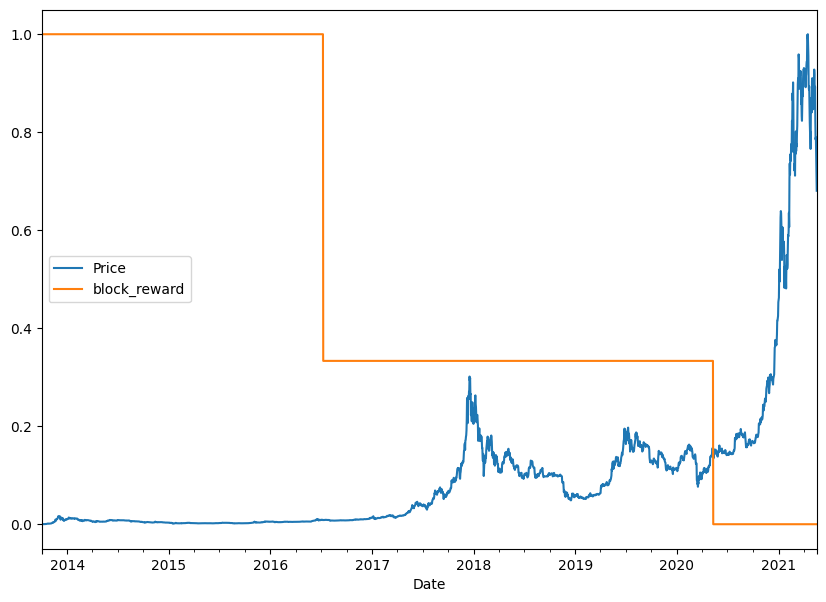

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Blok ödülünü ve Bitcoin fiyatını ölçeklendirdiğimizde, blok ödülü düştükçe fiyatın yükseldiğini görebiliriz, belki de bu bilgi modelimizin performansına yardımcı olacaktır.

minmax scale --> Her özelliği belirli bir aralığa ölçeklendirerek özellikleri dönüştürür.


# Pandalarla pencereli bir veri kümesi yapmak

Daha önce, tek değişkenli zaman serilerimizi pencerelemek için bazı özel işlevler kullandık.

Ancak, veri kümemize başka bir değişken eklediğimiz için bu işlevler çalışmayacaktır.

Yine de endişelenme. Verilerimiz bir panda DataFrame'de olduğundan, pencereli çok değişkenli bir zaman serisi oluşturmak için pandas.DataFrame.shift() yönteminden yararlanabiliriz.

Shift() yöntemi, bir dizini belirli sayıda periyotla dengeler. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   
2013-10-06  120.65533           25  121.33866  118.67466  108.58483   
2013-10-07  121.79500           25  120.65533  121.33866  118.67466   
2013-10-08  123.03300           25  121.79500  120.65533  121.33866   
2013-10-09  124.04900           25  123.03300  121.79500  120.65533   
2013-10-10  125.96116           25  124.04900  123.03300  121.79500   

              Price+4    Price+5    Price+6    Price+7  
Date                                                    
2013-10-01        NaN        NaN        NaN        NaN  
2013-10-02        NaN        NaN        NaN        NaN  
2013-10-03        NaN        NaN        NaN        NaN  
2013-10-04        NaN        NaN        NaN        NaN  
2013-10-05  123.65499        NaN        NaN        NaN  
2013-10-06  125.45500  123.65499        NaN        NaN  
2013-10-07  108.58483  125.45500  123.65499        NaN  
2013-10-08  118.67466  108.58483  125.45500  123.65499  
2013-10-09  121.33866  118.67466  108.58483  125.45500  
2013-10-10  120.65533  121.33866  118.67466  108.58483

Artık pencereli bir veri kümemiz olduğuna göre, özellikleri (X) etiketlerinden (y) ayıralım.

Pencereli veri kümemizde, HORIZON adımlarını tahmin etmek için önceki WINDOW_SIZE adımlarını kullanmaya çalıştığımızı unutmayın.

1'lik bir ufku tahmin etmek için bir hafta (7) pencere (çok değişkenli zaman serisi)

WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]

[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]

[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]

Ayrıca, pencereleme işlevimizi örnek 0 (ilk örnek) + WINDOW_SIZE'de başlatmaya eşdeğer olan pandas dropna() yöntemini kullanarak NaN değerlerini de kaldıracağız.

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

block_reward     Price+1     Price+2     Price+3     Price+4  \
Date                                                                       
2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   

               Price+5     Price+6     Price+7  
Date                                            
2013-10-08  108.584831  125.455002  123.654991  
2013-10-09  118.674660  108.584831  125.455002  
2013-10-10  121.338661  118.674660  108.584831  
2013-10-11  120.655327  121.338661  118.674660  
2013-10-12  121.794998  120.655327  121.338661

In [ ]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

Ne güzel görünen bir veri kümesi, daha önce yaptığımız gibi 80/20 bölme kullanarak onu trene ve test setlerine bölelim.

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Yağmur yağıyor ve çok değişkenli zaman serisi veri kümelerini test edin! Bir model oluşturma zamanı.

# Model 6: Yoğun (çok değişkenli zaman serileri)

İşleri basit tutmak için model_1 mimarisini kullanalım ve çok değişkenli zaman serisi verilerimizi eğitmek ve tahminlerde bulunmak için kullanalım.

Model_1 mimarisini çoğaltarak, blok ödül özelliğinin eklenmesinin model performansını iyileştirip iyileştirmediğini veya düşürmediğini görebileceğiz.

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Çok değişkenli model uyumu!

Modelin verilerimizin giriş şeklini otomatik olarak çıkardığını fark etmiş olabilirsiniz (verilerin artık ekstra bir özelliği var). Bununla birlikte, genellikle durum böyle olacaktır, ancak şekil sorunlarıyla karşılaşıyorsanız, bir modeldeki ilk katmanın input_shape parametresini kullanarak giriş şeklini her zaman açıkça tanımlayabilirsiniz.

Çok değişkenli modelimizi değerlendirme zamanı.

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 565.5974


565.5973510742188

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8837.22 , 8780.67 , 9022.666, 8796.819, 8754.862, 8716.32 ,
       8647.856, 8571.345, 8422.99 , 8525.274], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.5973,
 'mse': 1164763.6,
 'rmse': 1079.2422,
 'mape': 2.5396786,
 'mase': 0.9935978}

Bu sonuçlar model_1 ile nasıl karşılaştırılır (aynı pencere boyutu ve ufuk, ancak blok ödül özelliği olmadan)?

In [ ]:
model_1_results

{'mae': 564.6448,
 'mse': 1152069.1,
 'rmse': 1073.3448,
 'mape': 2.5443797,
 'mase': 0.99192446}

Görünüşe göre blok ödülüne eklemek modelimize biraz yardımcı olmuş olabilir.

Ama deneyebileceğimiz birkaç şey daha var.

📖 Kaynak: Bir sinir ağı modelinin nasıl geliştirileceğine dair farklı fikirler için (model perspektifinden), not defteri 02'deki Modeli İyileştirme bölümüne bakın. https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/#improving-a-model

# 🛠Alıştırma(lar):

1. Model_6'ya 128 gizli birim içeren fazladan bir tf.keras.layers.Dense() katmanı eklemeyi deneyin, bu model performansını nasıl etkiler?

2. Bu modeli oluşturmanın daha iyi bir yolu var mı? Olduğu gibi, block_reward özelliği Bitcoin tarihsel fiyat özelliği ile birlikte paketlenmeli mi? Belki de çoklu girişli bir model (örneğin, Bitcoin fiyat geçmişi için bir model girişi ve block_reward için bir model girişi) oluşturmanın daha iyi çalışıp çalışmadığını test edebilirsiniz? Çok girişli bir modelin nasıl oluşturulacağına dair bir fikir için Notebook 09'un Model 4: Hibrit gömme bölümüne bakın. https://dev.mrdbourke.com/tensorflow-deep-learning/09_SkimLit_nlp_milestone_project_2/#model-4-combining-pretrained-token-embeddings-character-embeddings-hybrid-embedding-layer

# Model 7: N-BEATS algoritması

İşleri bir adım daha yukarı çıkarma zamanı.

Şimdiye kadar bir sürü daha küçük model denedik, sadece birkaç katmanlı modeller.

Ancak bir modelin performansını artırmanın en iyi yollarından biri, içindeki katman sayısını artırmaktır.

N-BEATS (Yorumlanabilir Zaman Serisi Tahmini için Nöral Temel Genişleme Analizi) algoritmasının yaptığı tam olarak budur. https://arxiv.org/pdf/1905.10437

N-BEATS algoritması, tek değişkenli zaman serisi problemlerine odaklanır ve M4 yarışmasının kazananında (bir tahmin yarışması) son teknoloji performansı elde eder. https://www.sciencedirect.com/science/article/pii/S0169207019301128

Bir sonraki modelleme deneyimiz için N-BEATS algoritmasının genel mimarisini çoğaltacağız (bkz. N-BEATS makalesinin bölüm 3.3). https://arxiv.org/pdf/1905.10437

Kağıttaki tüm ayrıntıları gözden geçirmeyeceğiz, bunun yerine şunlara odaklanacağız:

1. N-BEATS kağıdının Şekil 1'indeki model mimarisini çoğaltmak https://arxiv.org/pdf/1905.10437
2. N-BEATS kağıdının Ek D'sinde bulunabilen kağıtla aynı hiperparametreleri kullanma https://arxiv.org/pdf/1905.10437

Bunu yapmak bize pratik yapma fırsatı verecektir:

- tf.keras.layers.Layer alt sınıflandırması yaparak NBeatsBlock için özel bir katman oluşturma https://www.tensorflow.org/api_docs/python/tf/keras/Layer

  - Özel bir katman oluşturmak, TensorFlow'un mevcut bir katman uygulamasına sahip olmadığı veya bir katman yapılandırmasını birkaç kez tekrarlamak istediğinizde (örneğin, bir N-BEATS bloğu yığını gibi) yararlıdır.

- İşlevsel API kullanarak özel bir mimari uygulama

- Sorunumuzla ilgili bir makale bulmak ve nasıl gittiğini görmek

🔑 Not: Makalede göreceğiniz gibi, yazarlar "N-BEATS TensorFlow'da uygulandı ve eğitildi" diyor, biz de bunu yapacağız!

# Bir N-BEATS blok katmanı oluşturma ve test etme

Bir N-BEATS blok katmanı oluşturarak başlayalım, önce kodu yazacağız ve sonra neler olup bittiğini tartışacağız.

fig1. N-BEATS blok katmanı Tensorflow'da olmadığını için aşağıda bu katman oluşturuldu.

Makaledeki block, stack vs yapısına bakarsan aşağıda ilk bölümde self.n_layers'a kadar yazılı kodlar block input içindi. g^b(theta^b) olur.

Horizon, tahmin dönemini tahmin etmek istediğimiz geleceğe olan mesafedir. Nöron sayısı her bir katmandaki nöron sayısıdır ki FC (fully connected) olan görselde bu yazılı bu makale için. Bir stack içinde dört nöron var burada.

- self hidden, birinci FC alanı için.
- self theta, aşağıdaki FC'ye bağlı alanlar için.

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Gördükümüz NBeatsBlock özel katmanını ayarlama:

- Sınıf tf.keras.layers.Layer'den miras alır (bu, tf.keras.layers.Layer ile ilgili tüm yöntemleri verir)

- Yapıcı (def __init___(...)) tüm katman hiperparametrelerini ve **kwargs argümanını alır

  - **Kwargs argümanı, input_shape, trainable ve name gibi yapıcıda bahsedilmeyen tüm hiperparametrelerle ilgilenir.

- Yapıcıda, blok mimari katmanları oluşturulur:

  - Gizli katmanlar, ReLU aktivasyonu ile n_nuerons gizli birim katmanları ile tamamen bağlı bir yığın olarak oluşturulur.

  - Teta katmanı, doğrusal aktivasyonun yanı sıra theta_size gizli birimlerini kullanır

- Call() yöntemi, katman çağrıldığında çalıştırılan şeydir:

  - İlk önce girdileri (geçmiş Bitcoin verileri) gizli katmanların her birinden (ReLU aktivasyonu ile tamamen bağlı katmanlardan oluşan bir yığın) geçirir.

  - Girişler tam bağlı katmanların her birinden geçtikten sonra, geriye doğru tahminlerin (geriye doğru tahminler, şekil: giriş_size) ve tahminin (ileri tahminler, şekil: ufuk) döndürüldüğü teta katmanından geçirilirler.

In [ ]:
# Create NBeatsBlock custom layer
# class NBeatsBlock(tf.keras.layers.Layer) :
#definit_ (self, # the constructor takes all the hyperparameters for the layer input_size: int, theta_size: int, horizon: int, n _neurons: int,
#n_layers: int,
#**kwargs): # takes care of all of the arguments for the parent class (input_shape, trainable, name)
#super ( ).
#init (**kwargs)
#self. input_size = input_size
#self. theta_size = theta_size
#self. horizon = horizon
#self.n_neurons = n_neurons
#self.n_layers = n _layers
# Block contains stack of 4 fully connected layers each has ReLU activation
#self hidden = [tf. keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
#• # Output of block is a theta layer with linear activation
#•self. theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta") :
#def call(self, inputs): # the call method is what runs when the layer is called
#x = inputs
#for layer in self.hidden: # pass inputs through each hidden layer
#x = layer (x)
#theta = self. theta_layer (x)
# Output the backcast and forecast from theta
#backcast, forecast = theta[:, :self. input_sizel, theta[:, -self.horizon: ]
#return backcast, forecast

N-BEATS temel bloğunu çoğaltmak için TensorFlow katmanı alt sınıflandırmasını kullanma. Ayrıntılar için N-BEATS kağıdının 3.1 bölümüne bakın.

NBeatsBlock'un oyuncak versiyonunu oluşturarak birlikte blok kopyamızı çalışırken görelim.

📖 Kaynak: N-BEATS algoritmasının çoğaltılması da dahil olmak üzere zaman serisi materyallerinin (şu anda yaşadıklarınız) oluşturulmasının çoğu Twitch'te canlı olarak yayınlandı. Algoritmanın nasıl çoğaltıldığına dair tekrarları görmek isterseniz, Daniel Bourke arXiv YouTube kanalındaki Time serisi araştırmasına ve TensorFlow kurs materyali oluşturma oynatma listesine göz atın. https://www.youtube.com/playlist?list=PL8IpyNZ21vUSCM7nRAuS-hW_E-sgwdmaI&themeRefresh=1

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

input shape --> 2d (batch_size, input_dim)

output shape --> 2d (batch_size, units)

In [ ]:
z# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 1.1520088e-01 -3.9132822e-01 -7.6389629e-01 -1.1202693e-04
 -3.7395513e-01  9.3826525e-02 -1.4961216e-01]
Forecast: 0.5381227731704712


# Tf.data kullanarak N-BEATS algoritması için veri hazırlama

N-BEATS mimarisi için kullanıma hazır temel yapı taşımız var.

Ancak tüm N-BEATS genel mimarisini çoğaltmak için kullanmadan önce, bazı veriler oluşturalım.

Bu sefer, daha büyük bir model mimarisi kullanacağımız için, model eğitimimizin mümkün olduğunca hızlı çalışmasını sağlamak için veri kümelerimizi tf.data API'sini kullanarak kuracağız.

Ve N-BEATS algoritması tek değişkenli zaman serilerine odaklandığından, Bitcoin fiyatlarının (tıpkı yukarıda yaptığımız gibi) pencereli veri kümelerini eğiterek ve test ederek başlayacağız.

In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

Price    Price+1    Price+2    Price+3    Price+4    Price+5  \
Date                                                                           
2013-10-08  123.03300  121.79500  120.65533  121.33866  118.67466  108.58483   
2013-10-09  124.04900  123.03300  121.79500  120.65533  121.33866  118.67466   
2013-10-10  125.96116  124.04900  123.03300  121.79500  120.65533  121.33866   
2013-10-11  125.27966  125.96116  124.04900  123.03300  121.79500  120.65533   
2013-10-12  125.92750  125.27966  125.96116  124.04900  123.03300  121.79500   

              Price+6    Price+7  
Date                              
2013-10-08  125.45500  123.65499  
2013-10-09  108.58483  125.45500  
2013-10-10  118.67466  108.58483  
2013-10-11  121.33866  118.67466  
2013-10-12  120.65533  121.33866

In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Tren ve test setleri yola çıkmaya hazır!

Şimdi eğitim sırasında mümkün olduğunca hızlı çalışmalarını sağlamak için onları TensorFlow tf.data.Dataset'e dönüştürelim.

Bunu şununla yapacağız:

1. tf.data.Dataset.from_tensor_slices() kullanarak tensör Veri Kümelerindeki dizileri döndürme https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices

  - Not: from_tensor_slices(), verileriniz belleğe sığdığında en iyi şekilde çalışır, son derece büyük veri kümeleri için TFRecord formatını kullanarak bakmak isteyeceksiniz https://www.tensorflow.org/tutorials/load_data/tfrecord?hl=tr

2. tf.data.Dataset.zip() kullanarak etiketleri ve özellik tensörlerini bir Veri Kümesinde birleştirin https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip

3. Batch() ve prefetch() kullanarak Veri Kümelerini toplu olarak toplayın ve ön yükleme

  - https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch

  - https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch

  - Gruplama ve ön alma, CPU'dan (veri hazırlama) GPU'ya (veri üzerinde hesaplama) yükleme süresinin mümkün olduğunca küçük olmasını sağlar

📖 Kaynak: Yüksek performanslı TensorFlow veri boru hatları oluşturma hakkında daha fazla bilgi için, tf.data API kılavuzuyla daha iyi performansı okumanızı tavsiye ederim. https://www.tensorflow.org/guide/data_performance?hl=tr

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Veriler hazırlandı! Özellikler için giriş şekline dikkat edin (Yok, 7), Yok, 7 olarak WINDOW_SIZE'i temsil ettiği toplu boyut için yer bırakır.

N-BEATS mimarisini oluşturma zamanı.

# N-BEATS algoritması için hiperparametrelerin ayarlanması

Veri kümeleri hazır, model yapı taşı hazır, bir şeyleri bir araya getirdiğimizi ne söyledin?

İyi fikir.

Tamam.

Hadi gidelim.

Başlamak için, N-BEATS kopyamız için kullanacağımız hiperparametrelerin her biri için değişkenler oluşturacağız.

📖 Kaynak: Aşağıdaki hiperparametreler N-BEATS makalesinin Şekil 1 ve Tablo 18/Ek D'sinden alınmıştır. https://arxiv.org/pdf/1905.10437

N-BEATS'in farklı varyantları için kullanılan hiperparametreleri açıklayan N-BEATS makalesinden Tablo 18. N-BEATS'ın genel sürümü anlamına gelen N-BEATS-G kullanıyoruz.

🔑 Not: Bir makine öğrenimi örneğinde "N_EPOCHS = 100" gibi tüm büyük harflerle değişkenler görürseniz, bu değişkenler genellikle örnek aracılığıyla kullanılan hiperparametrelerdir. Genellikle bir deneyin başlangıcına doğru örneklendiğini ve daha sonra baştan sona kullanıldığını göreceksiniz.

Dokümana göre n-beats çizgisindeki rakamlar referans alındı. Burada 5k iterasyon yani epochs 5000, width 512 yani nöronlardır. Yine dokümana göre 4 katman oluğu belli ve ilk FC'li alan bir stack, yanda ise bu stack olanlar birleşir.

Lockback period, burada windows size.

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

# Kalan bağlantılar için hazırlanıyor

Güzel! Hiperparametreler hazır, şimdi N-BEATS modelini oluşturmadan önce, mimaride büyük bir rol oynayan iki katman var.

N-BEATS çift kalıntı istiflemeyi (N-BEATS kağıdının 3.2. bölümü) mümkün kılan şeydir: https://arxiv.org/pdf/1905.10437

* Tf.keras.layers.subtract(inputs) - giriş tensörlerinin listesini birbirinden çıkarır https://www.tensorflow.org/api_docs/python/tf/keras/layers/subtract

* Tf.keras.layers.add(inputs) - birbirlerine giriş tensörlerinin listesini ekler https://www.tensorflow.org/api_docs/python/tf/keras/layers/add

Onları deneyelim.

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


N Beats algoritması derin mimarisini eğitmeye yardımcı olmak için çift kalıntı istifleme (double residual stacking) kullanır (3.2 bölüm).



Bu katman işlevlerinin her ikisi de basittir, girdilerini çıkarır veya bir araya getirir.

Ve daha önce de belirtildiği gibi, N-BEATS çift kalıntı istiflemeye güç veren şey bunlar.

Artık istiflemenin veya artık bağlantıların gücü, yazarların önceki girişimlerden daha derin ama daha az karmaşık bir sinir ağı (popüler ResNet mimarisini tanıtan şey budur) oluşturabildiği Görüntü Tanıma için Derin Kalıntı Öğrenme'de ortaya çıktı.
- https://arxiv.org/abs/1512.03385
- https://en.wikipedia.org/wiki/Residual_neural_network

Bu daha derin sinir ağı, 2015'te ImageNet mücadelesinde en son sonuçlara yol açtı ve o zamandan beri derin öğrenmede artık bağlantıların farklı versiyonları mevcut.

Kalıntı bağlantı nedir?

Artık bağlantı (atlama bağlantıları olarak da adlandırılır), daha sığ bir sinir ağı katmanının girişlerinin yanı sıra çıktıları da alan daha derin bir sinir ağı katmanını içerir.

N-BEATS durumunda, mimari artık bağlantılar kullanır:

* Önceki bir bloktan geri döküm çıkışlarını geri yayın girişlerinden mevcut bloka çıkarın

* Tüm bloklardan tahmin çıktılarını bir yığın halinde bir araya getirin

Mimarinin çift kalıntı istiflenmesini (bölüm 3.2) vurgulayan N-BEATS kağıdından Şekil 1'in açıklamalı versiyonu. Her bloğun geri dönüş artıkları birbirinden çıkarılır ve her bloğun tahminlerinin yığın tahmini olmak için bir araya getirildiği bir sonraki bloğa girdi olarak kullanılır.

Kalıntı bağlantıların faydaları nelerdir?

Uygulamada, artık bağlantılar daha derin modelleri eğitmek için faydalı olmuştur (N-BEATS ~150 katmana ulaşır, ayrıca bkz. "Bu yaklaşımlar, N-BEATS makalesinin 3.2 bölümünde derin mimarilerin eğitilebilirliğini geliştirmede açık avantajlar sağlar").

Gradyanların (daha derin katmanlara aktarılmayan bir sinir ağı tarafından öğrenilen desenler) yok olma sorunundan kaçınmaya yardımcı oldukları düşünülmektedir.
- https://en.wikipedia.org/wiki/Vanishing_gradient_problem
- https://arxiv.org/pdf/1905.10437

Dokümandaki grafiğe dikkat. İkinci alandaki stack'lerin birleştiği yerde - işaretleri ve + işaretleri, residual bağlantılarıdır. Eksi olanda azalma, artı olanda birleşme çoğalma unutma. Eksi olanda nöronlar çok küçülmüş olarak çıkar.



# N-BEATS algoritmasını oluşturma, derleme ve takma

N-BEATS algoritmasını oluşturmak ve eğitmek için bulmacanın tüm parçalarını hazırladık.

Bunu aşağıdakilerden geçerek yapacağız:

1. NBeatsBlock kullanarak N-BEATS blok katmanının bir örneğini kurun (bu, ağ için kullanılan ilk blok olacaktır, geri kalanı yığınların bir parçası olarak oluşturulacaktır)

2. N-BEATS yığını için bir giriş katmanı oluşturun (bunun için Keras İşlevsel API'sini kullanacağız) https://www.tensorflow.org/guide/keras/functional_api

3. (1)'de oluşturulan katmanla model için ilk geri yayımı ve tahminleri yapın

4. Blok katman yığınları oluşturmak için bir for döngüsü kullanın

5. Geri dönüşler ve blok düzeyinde tahminler döndüren bloklar oluşturmak için (4)'te oluşturulan for döngüsündeki NBeatsBlock sınıfını kullanın

6. Katmanları çıkararak çift kalıntı yığını oluşturun ve ekleyin

7. tf.keras.Model() kullanarak model girişlerini ve çıkışlarını bir araya getirin https://www.tensorflow.org/api_docs/python/tf/keras/Model

8. Modeli MAE kaybıyla derleyin (kağıt birden fazla kayıp kullanır, ancak diğer modellerimizle aynı hizada tutmak için MAE kullanacağız) ve N-BEATS kağıdının 5.2. bölümüne göre varsayılan ayarlarla Adam optimize edici) https://arxiv.org/pdf/1905.10437

9. 5000 dönem için N-BEATS modelini takın ve bu kadar çok dönem için uygun olduğu için birkaç geri arama kullanacağız:

- tf.keras.callbacks.EarlyStopping() - 200 dönem için doğrulama kaybını iyileştirmezse modeli antrenmandan durdurun ve restore_best_weights=True kullanarak en iyi performans gösteren ağırlıkları geri yükleyin (bu, modelin iyileştirme olmadan loooogggggg süresi için antrenman yapmasını engelleyecektir) https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

- tf.keras.callbacks.ReduceLROnPlateau() - modelin doğrulama kaybı 100 dönem için iyileşmezse, denemek ve artımlı iyileştirmeler yapmasına yardımcı olmak için öğrenme oranını 10 kat azaltın (öğrenme oranı ne kadar küçükse, bir modelin yapmaya çalıştığı daha küçük güncellemeler) https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 295: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 395: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 12s, sys: 3.5 s, total: 2min 15s
Wall time: 2min 44s


 Residuals --> Zaman serisinde kalıntılar, bir model uydurulduktan (fitting) sonra kalanlardır. Genellikle bu gözlemler ile karşılık gelen fit edilmiş değerler arasındaki farktır. Bu nedenle residuals, bir modelin verilerdeki bilgileri yeterince yakalayıp yakalamadığını kontrol etmede yararlıdır.

 Dördüncü maddede neden -1. Çünkü ilk blok katmanımız olacak. N beats = 30. Mevcut bloğumuz olduğu için 30 kere döngü yapmaya gerek yok, 29 olmalı.





In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 28ms/step - loss: 580.3432 - mae: 580.3432 - mse: 1175777.0000


[580.3432006835938, 580.3432006835938, 1175777.0]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8939.159, 8862.64 , 9100.125, 8792.964, 8864.391, 8786.478,
       8668.427, 8602.48 , 8522.389, 8567.695], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results


{'mae': 580.3432,
 'mse': 1175777.0,
 'rmse': 1084.3325,
 'mape': 2.6703465,
 'mase': 1.0195023}

Tüm bu özel katmanlar ve el yapımı ağ ile ven, N-BEATS modeli model_1 veya orijinal naif tahmin kadar iyi performans göstermiyor gibi görünüyor.

Bu, daha küçük ağların gücünü ve tüm büyük modellerin belirli bir veri türü için daha uygun olmadığı gerçeğini gösterir.

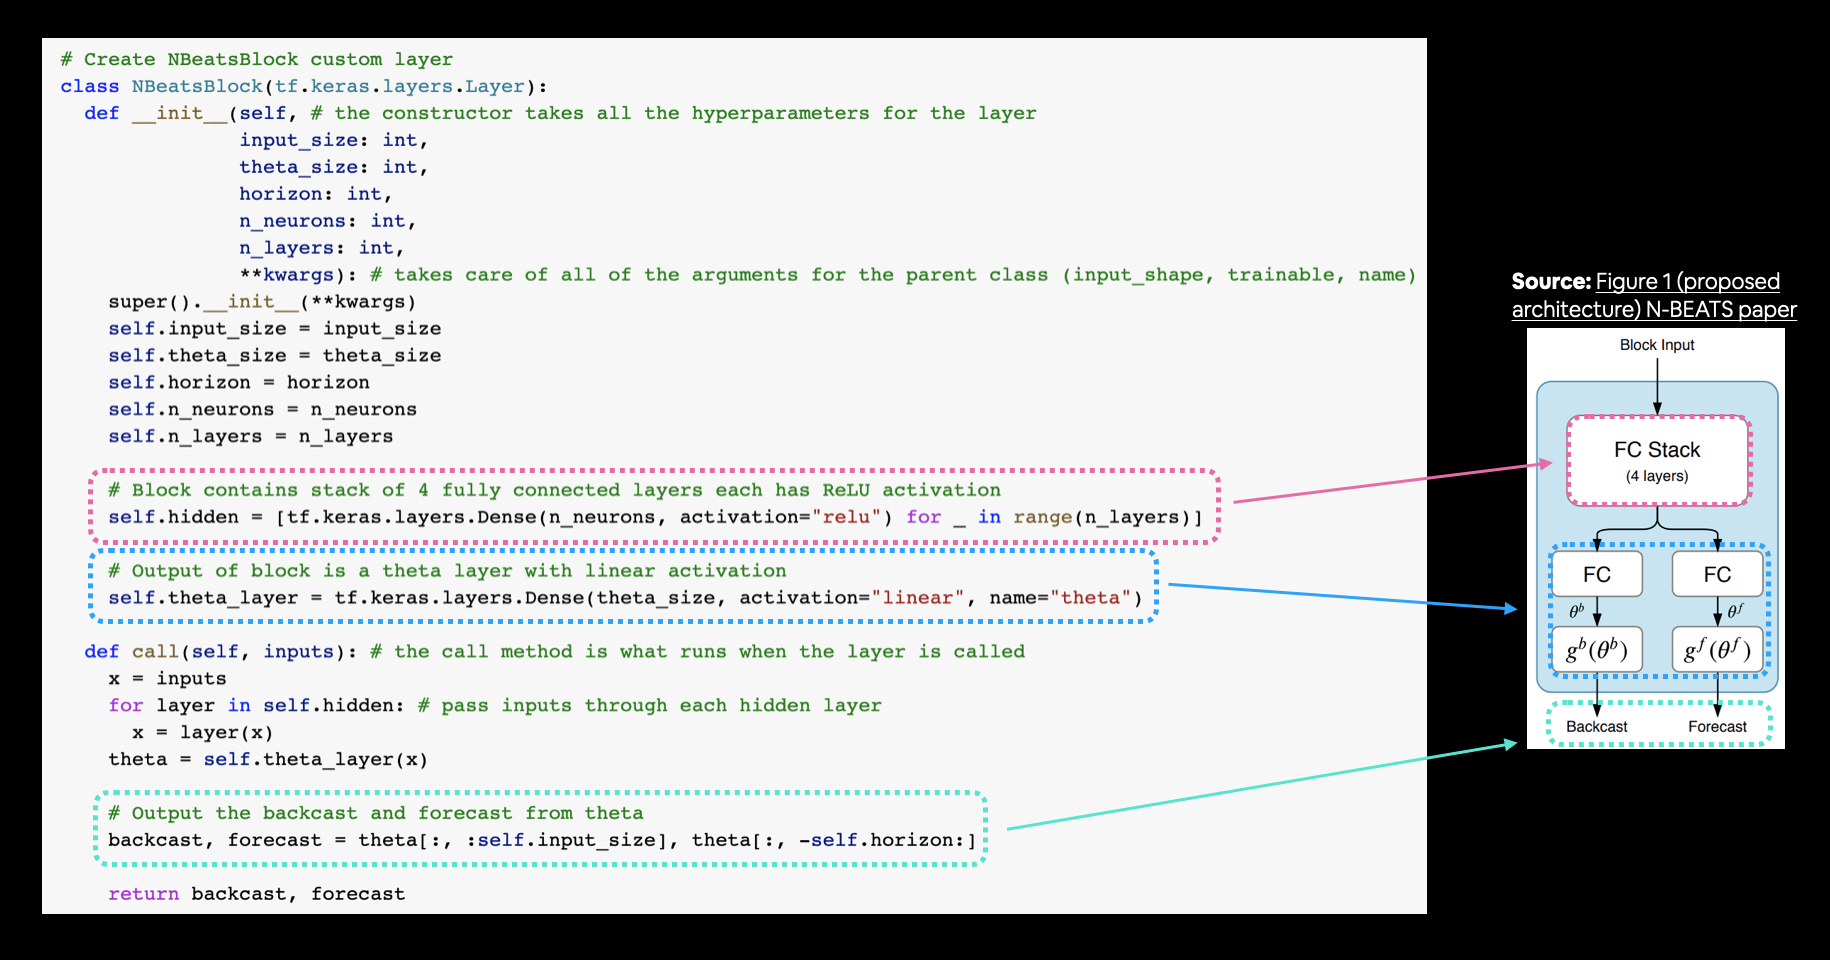

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-nbeats-basic-block-replication-with-tensorflow-layer-subclassing.png"

# Resmi göster
display(Image(image_url))


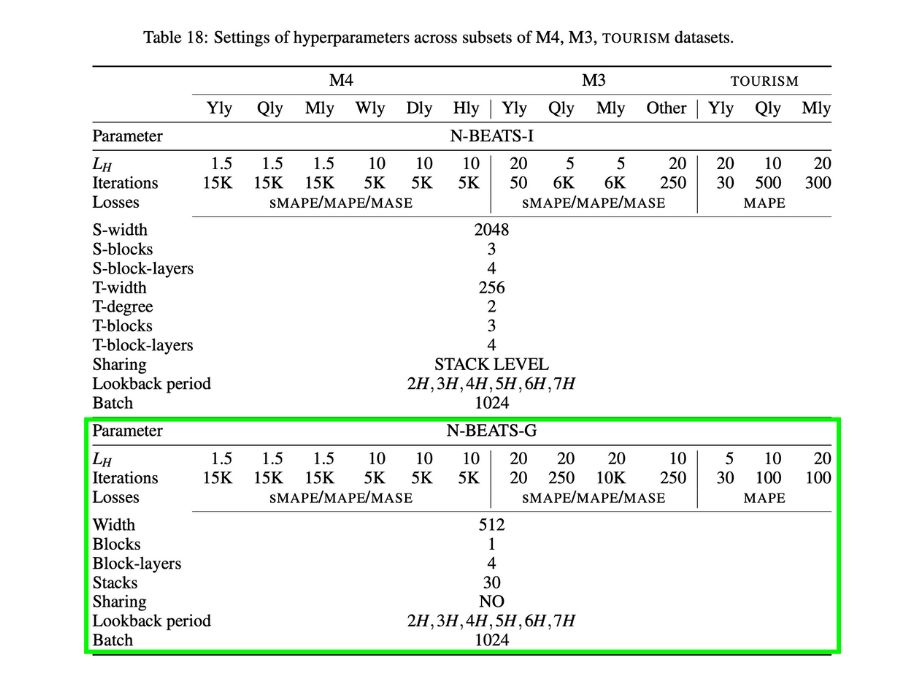

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-nbeats-table-18-hyperparameters.png"

# Resmi göster
display(Image(image_url))


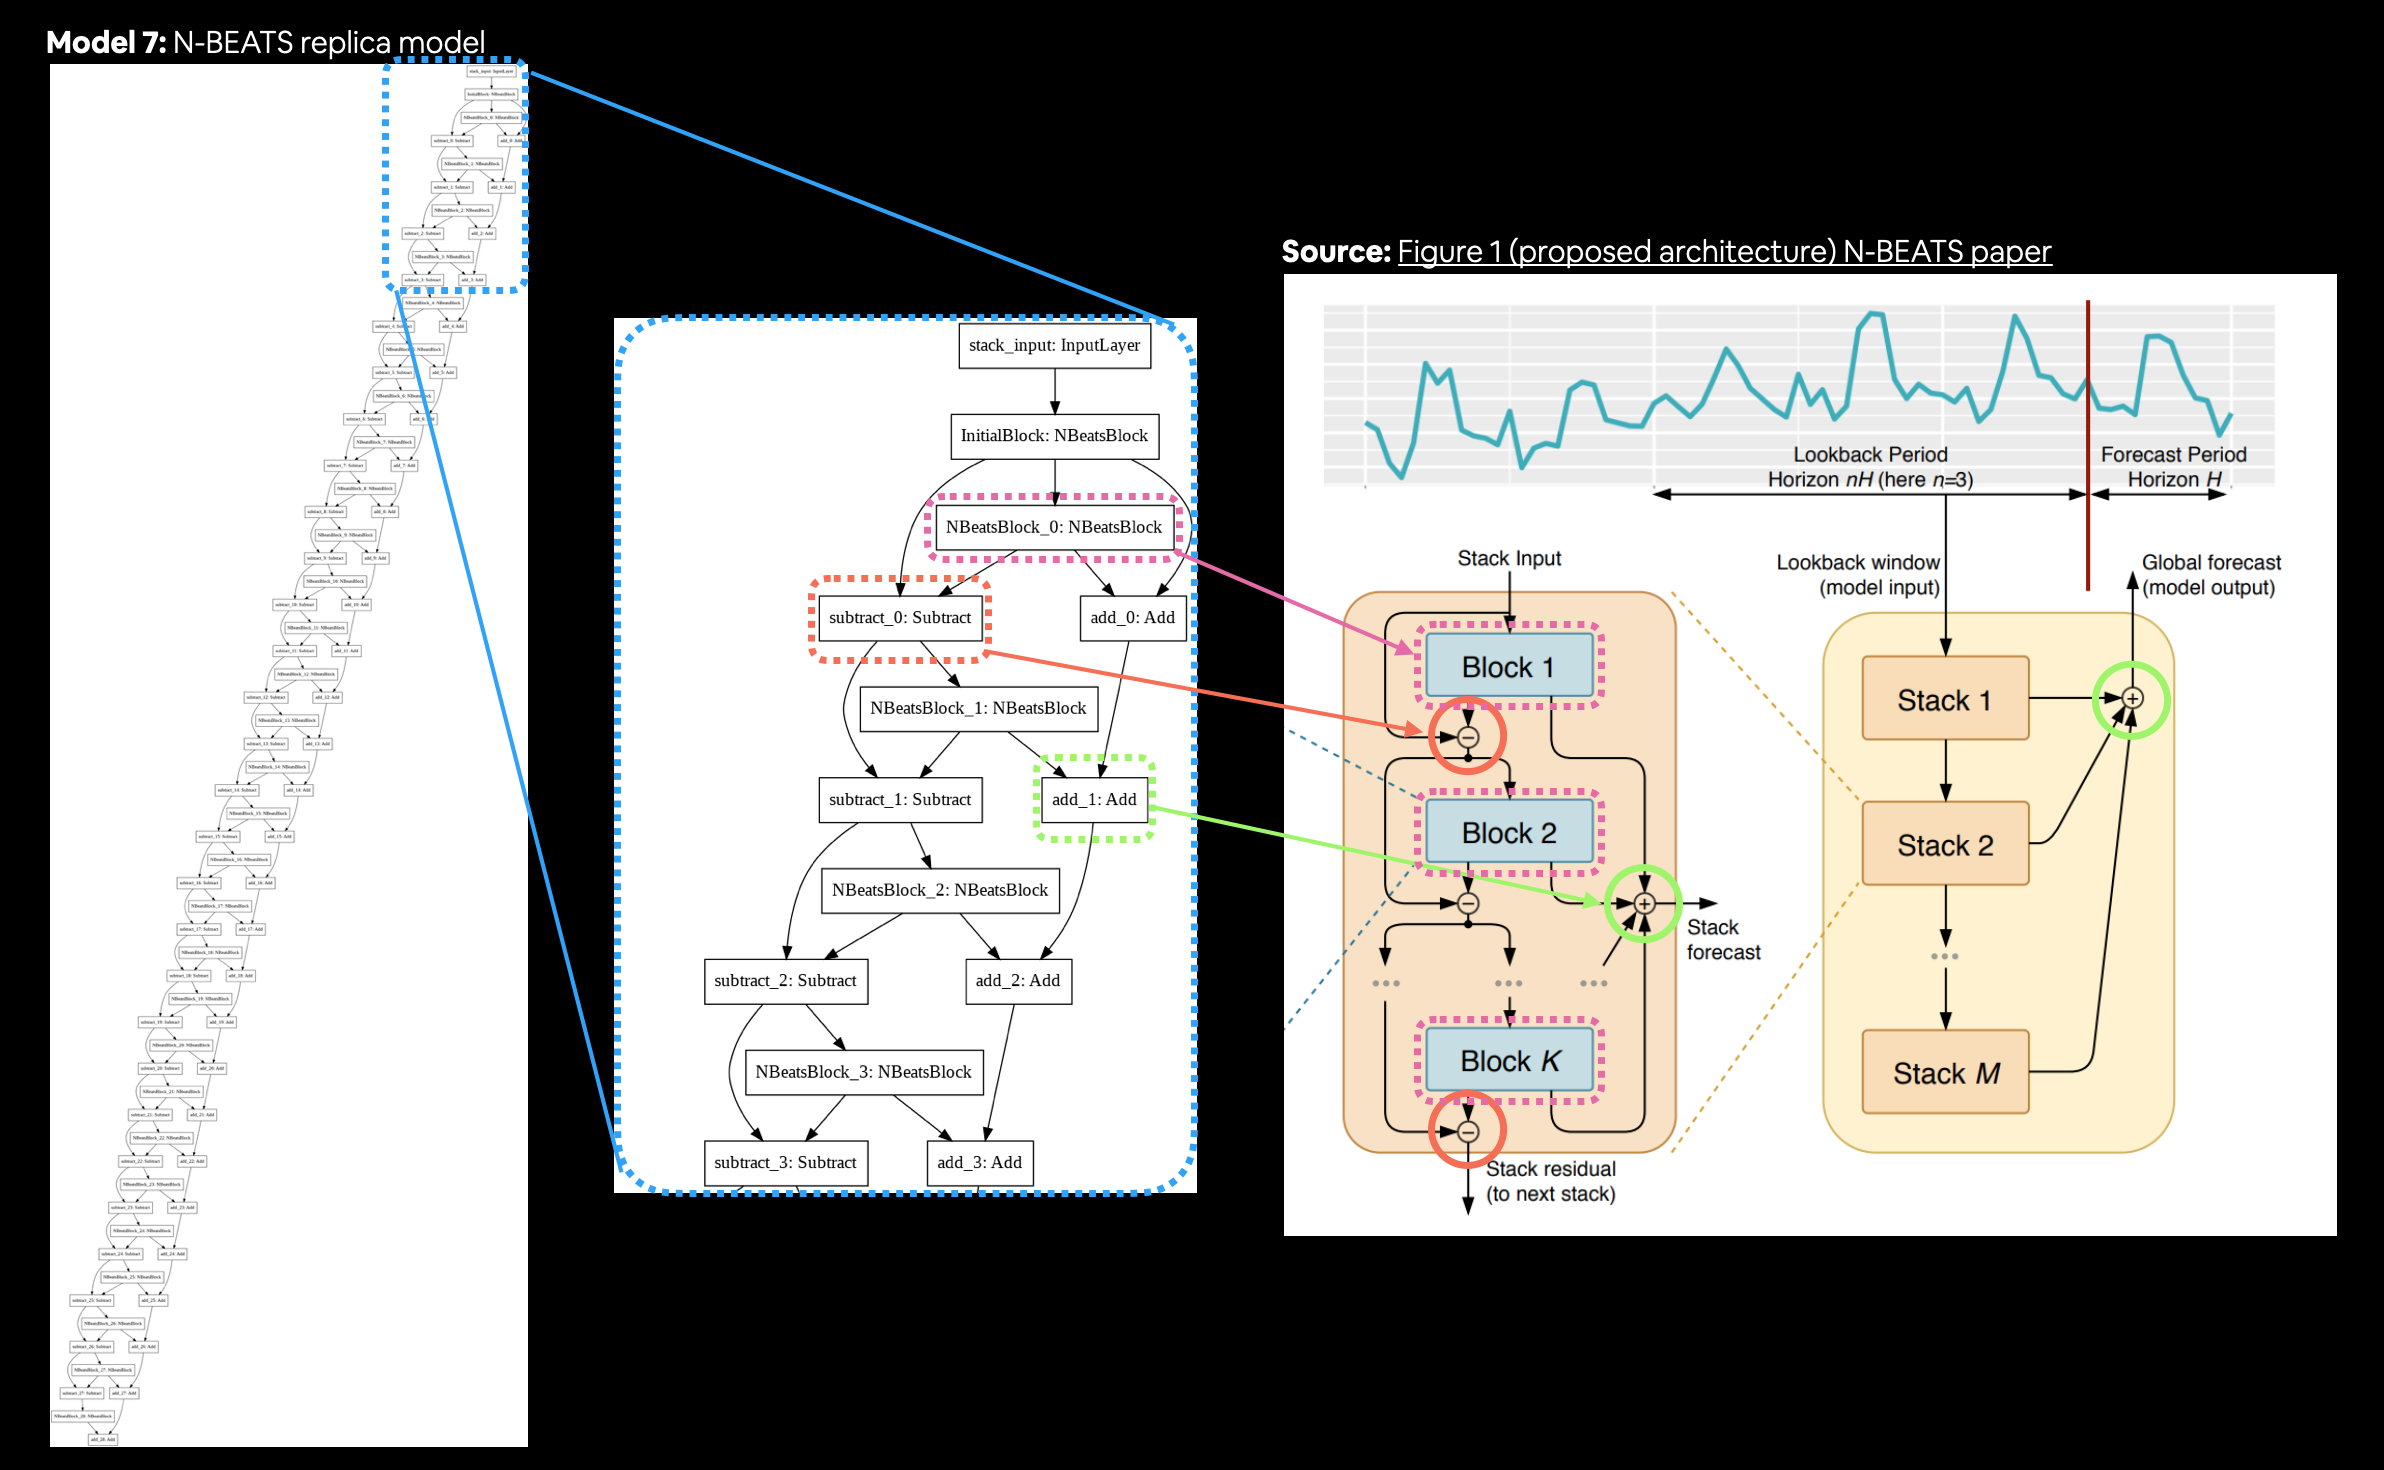

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-nbeats-stack-model-vs-nbeats-architecture.png"

# Resmi göster
display(Image(image_url))


# Oluşturduğumuz N-BEATS mimarisini çizmek

Ne havalı olurdu biliyor musun?

Hazırladığımız N-BEATS modelini çizebilseydik.

Görünüşe göre tensorflow.keras.utils.plot_model() kullanabiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

Bakalım neye benziyor.

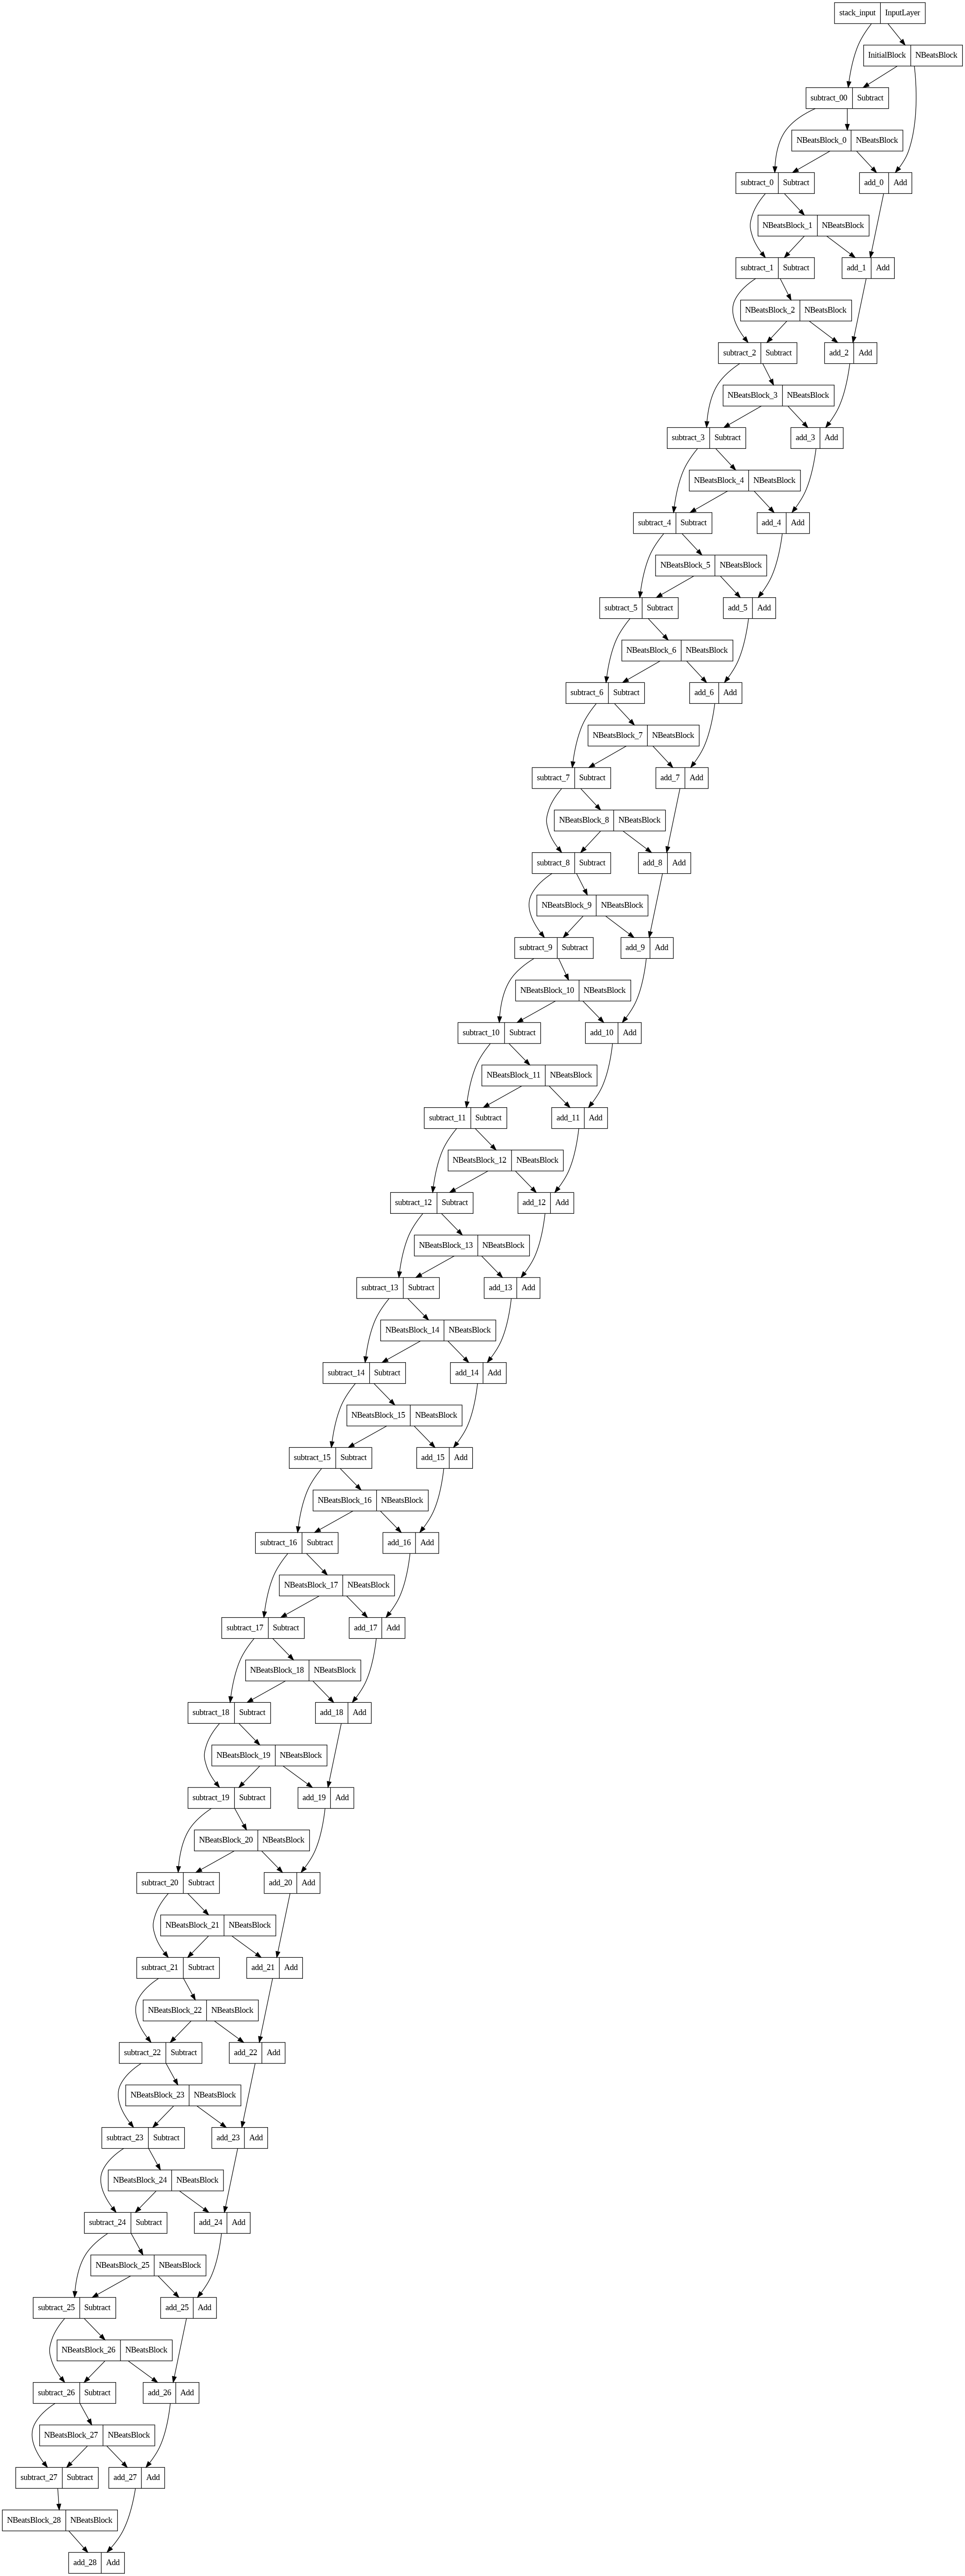

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Keras Functional API) ve gerçek N-BEATS mimari diyagramı.

İşlevsel API kullanımımız hile yapmış gibi görünüyor!

🔑 Not: N-BEATS modelimiz N-BEATS genel mimarisini kopyalar, eğitim kurulumları büyük ölçüde aynıdır, ancak tahminler yapmak için bir model topluluğu kullanılır (birden fazla farklı kayıp fonksiyonu ve birden fazla farklı geriye bakış penceresi), daha fazla bilgi için N-BEATS kağıdının Tablo 18'ine bakın. Bu tür bir eğitim rejimini kurmak ve performansı iyileştirip iyileştirmediğini görmek için bir uzantı olabilir.

N-BEATS modelinin versiyonumuzu kaydetmeye ne dersiniz?

fig1 -->
- substract = -
- add = +
- NBeatsblock = Block1

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

Modelimizi tam olarak doğru bir şekilde kaydetmemizi söyleyen bir uyarının göründüğünü fark edeceksiniz, özel katman sınıfımızda bir get_config() yöntemi uygulamamız gerekiyor.

📖 Kaynak: N-BEATS modelini veya başka herhangi bir özel veya alt sınıflandırılmış katman/model yapılandırmasını kaydetmek ve yüklemek istiyorsanız, get_config() ve isteğe bağlı olarak from_config() yöntemlerinin üzerine yazmalısınız. Daha fazla bilgi için TensorFlow Custom Objects belgelerine bakın. https://www.tensorflow.org/guide/keras/serialization_and_saving#custom_objects

# Model 8: Bir topluluk oluşturma (farklı modelleri bir araya getirme)

Tüm bu çabalardan sonra, N-BEATS algoritmasının performansı yetersizdi.

Ama yine de, bu makine öğreniminin bir parçasıdır. Her şey işe yaramayacak.

İşte o zaman slogana geri dönüyoruz: deney, deney, deney.

Bir sonraki deneyimiz bir model topluluğu oluşturmaktır. https://en.wikipedia.org/wiki/Ensemble_learning

Bir topluluk, aynı problem üzerinde birden fazla farklı modeli eğitmeyi ve birleştirmeyi içerir. Topluluk modelleri genellikle Kaggle gibi web sitelerinde veri bilimi yarışmalarını kazandığını göreceğiniz model türleridir.

Birleştirme gücü örneği. Bir Daniel modeli 7'lik bir akıllı seviye ile bir karar verir, ancak bir Daniel modeli birden fazla farklı insanla bir araya geldiğinde, birlikte (bir araya getirilmiş) 10 akıllı seviye ile bir karar verirler. Buradaki anahtar, farklı geçmişlere sahip insanların karar gücünü birleştirmektir, birden fazla Daniel modelini birleştirirseniz, ortalama 7 akıllı seviyeye sahip olursunuz. Not: akıllı seviye, karar vermenin gerçek bir ölçümü değildir, yalnızca gösteri amaçlıdır.

Örneğin, N-BEATS makalesinde, aşağıdakilerin bir kombinasyonunu kullanarak elde ettikleri sonuçları elde etmek için bir model topluluğu (toplamda 180, bkz. bölüm 3.4) eğittiler:

- Farklı kayıp fonksiyonları (sMAPE, MASE ve MAPE)

- Farklı pencere boyutları (2 x ufuk, 3 x ufuk, 4 x horizon...)

Topluluk modellerinin yararı, "kalabalık etkisinin kararını" almanızdır. Tek bir modelin tahminlerine güvenmek yerine, birçok farklı modelin ortalamasını veya medyanını alabilirsiniz. https://en.wikipedia.org/wiki/Ensemble_forecasting

Anahtar kelime: farklı.

Aynı modeli aynı veriler üzerinde 10 kez eğitmek ve ardından tahminlerin ortalamasını almak mantıklı olmaz.

Neyse ki, rastgele başlatmaları nedeniyle, aynı mimariye sahip derin öğrenme modelleri bile farklı sonuçlar üretebilir.

Bununla demek istediğim, her derin öğrenme modeli oluşturduğunuzda, rastgele kalıplarla (ağırlıklar ve önyargılar) başlar ve daha sonra bu rastgele kalıpları, üzerinde eğitildiği veri kümesine daha iyi uyacak şekilde ayarlar.

Bununla birlikte, bu kalıpları ayarladığı süreç genellikle bir rehberli rastgelelik biçimidir (SGD optimize edici, stokastik veya rastgele gradyan iniş anlamına gelir).

Topluluk modellerimizi oluşturmak için aşağıdakilerin bir kombinasyonunu kullanacağız:

- Farklı kayıp fonksiyonları (MAE, MSE, MAPE)

- Rastgele başlatılan modeller

Esasen, hepsi aynı verileri modellemeye çalışan bir dizi farklı model oluşturacağız.

Ve umarım her modelin birleşik tahmin gücü, kendi başına tek bir modelden daha iyidir.

Hadi öğrenelim!

Farklı kayıp fonksiyonlarıyla eğitilmiş farklı modellerin bir listesini üretmek için bir işlev oluşturarak başlayacağız. Topluluk modellerindeki her katman, He normal başlatma kullanılarak rastgele bir normal (Gauss) dağılımla başlatılacaktır, bu daha sonra tahmin aralıklarını tahmin etmeye yardımcı olacaktır.
- https://en.wikipedia.org/wiki/Normal_distribution
- https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal

🔑 Not: Makine yalınlama deneylerinizde, topluluk modellerinin örneklerini zaten ele almış olabilirsiniz. Rastgele orman modeli gibi algoritmalar bir topluluk biçimidir, her bir ağacın kötü performans gösterebileceği, ancak birleştirildiğinde harika sonuçlar verdiği bir dizi rastgele oluşturulmuş karar ağacı kullanır. https://towardsdatascience.com/understanding-random-forest-58381e0602d2

# Bir model topluluğu oluşturmak ve takmak (farklı kayıp fonksiyonları kullanarak)

- Eğitimli modellerin listesini döndürecek bir fonks. yazılır. Tahminlerde bulunmak için bu modeller listesini kullanacağız. Eğitim verileri için train veri seti kullanılır böylece bunlar varsayılan olur.

num_iter --> Kaç farklı model olduğudur, eğiteceğimiz.

Construction a simple model --> Bu modele bir numara vermek zorunda değiliz çünkü bir döngü var ve eğitim modellerimiz bu boş listeye eklenir.

kernel initializer --> Katmanların hepsi rastgele kalıplarla başlar. Bu ise yoğun katmana ne tür kalıpların başlatılacağını söyler; uniform ya da normal distribution olabilir. Ancak, eğitim verilerimizden geçerken, bu dağıtım kalıplarının
derin öğrenme algoritmamız neye uygunsa olsun karar verirse değiştirin ve uyum sağlayın.
Verilerimize en uygunu seçilmeli.

Burada rastgele başlatma ile yeni bir model oluşturacak. Yani bu modellerin her biri rastgele ağırlıklarla başlayacak ve hedef tarafından yavaşça ayarlanacak.

Earlystop... eğer 200 dönem boyunca gelişme sağlanmazsa eğitime devam etme, modeli en iyi ağırlıklara geri döndür.



In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

Topluluk modeli oluşturucu işlevi oluşturuldu!

1000 dönem için num_iter=5 runs çalıştırarak deneyelim. Bu, toplam 15 modelle sonuçlanacaktır (her farklı kayıp fonksiyonu için 5).

Tabii ki, bu sayılar daha uzun süre eğitilmiş daha fazla model oluşturmak için ayarlanabilir.

🔑 Not: Topluluklarda, genellikle daha fazla toplam model bulacaksınız, daha iyi performans anlamına gelir. Bununla birlikte, bu, daha fazla model (daha uzun eğitim süresi) eğitmek ve daha fazla modelle (daha uzun tahmin süresi) tahminler yapmak zorunda kalmanın ödünüyle birlikte gelir.

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 444: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 753: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 853: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 403: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 503: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 256: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 356: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 897: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 213: ReduceLROnPl

Şimdi tahmin yapmak için eğitilmiş topluluk modellerinin listesini kullanmak ve ardından bir tahmin listesi (model başına bir tahmin seti) döndürmek için bir işlev yazmaya ne dersiniz?

# Bir topluluk modeli ile tahminlerde bulunmak

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 39ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8834.221,  8798.309,  9019.546, ..., 49979.14 , 48683.57 ,
        46115.086],
       [ 8780.874,  8740.104,  9053.599, ..., 50330.09 , 49091.04 ,
        46041.64 ],
       [ 8770.185,  8752.204,  9079.287, ..., 49765.395, 48606.805,
        46272.754],
       ...,
       [ 8830.703,  8815.133,  9045.978, ..., 49995.652, 48332.11 ,
        45950.34 ],
       [ 8750.521,  8777.56 ,  9132.798, ..., 50275.66 , 49001.902,
        46269.277],
       [ 8717.117,  8781.39 ,  9113.982, ..., 49186.33 , 48342.85 ,
        47024.17 ]], dtype=float32)>

Şimdi bir dizi topluluk tahminimiz var, bunları temel doğruluk değerlerine karşı değerlendirebiliriz.

Ancak, 15 model eğittiğimiz için 15 set tahmin olacak. Her tahmin setini temel gerçekle karşılaştırmak yerine, medyanı alalım (ortalamayı da alabilirsin, ancak medyan genellikle ortalamadan daha sağlamdır). https://www.johndcook.com/blog/2009/03/06/student-t-distribution-mean-median/

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 570.9259,
 'mse': 1152177.1,
 'rmse': 1073.3951,
 'mape': 2.5657113,
 'mase': 1.0029587}

Regresyon tahminlerini birleştirme --> Regresyon problemleri için performans genellikle ortalama hata ile ölçülür, ortalama mutlak hata veya ortalama hataların karesi...
- Ortalama tahmini değer
- Tahmini değerin medyanı.

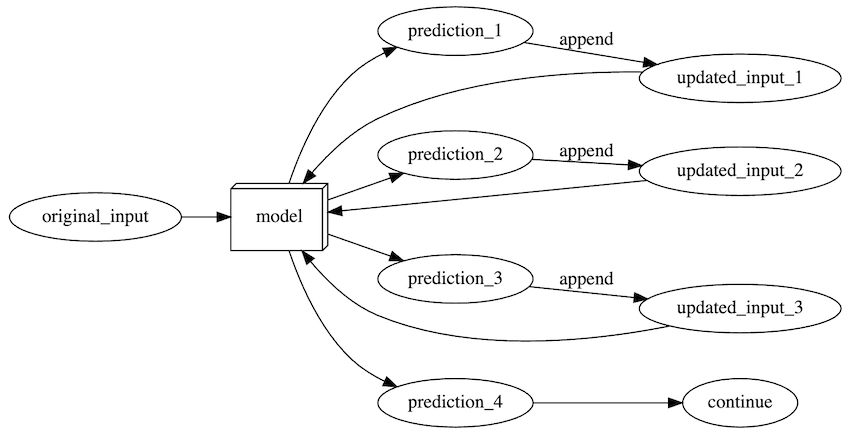

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-prediction-loop-for-forecasts.png"

# Resmi göster
display(Image(image_url))


# Topluluğumuzun tahmin aralıklarını (belirsizlik tahminleri) çizmek

Şu anda tüm modellerimiz (topluluk modelinden önce) tek noktaları tahmin ediyor.

Yani, bir dizi WINDOW_SIZE=7 değeri verildiğinde, model HORIZION=1'i tahmin edecektir.

Ama tek bir değerden daha yararlı ne olabilir?

Belki bir dizi değer?

Örneğin, bir model Bitcoin'in fiyatının yarın 50.000 USD olacağını tahmin ediyorsa, fiyatın 48.000 ile 52.000 USD arasında olacağını tahmin ettiği için 50.000 USD'yi tahmin ettiğini bilmek yararlı olur mu? (Not: "$" biçimlendirme sorunları nedeniyle önceki cümleden çıkarıldı)

Bir modelin tahmin ettiği değer aralığını bilmek, tahminleriniz için daha iyi kararlar vermenize yardımcı olabilir.

Modelin 50.000 USD (bir nokta tahmini veya zaman içinde tek bir değer) tahmin etmesine rağmen, değerin aslında 48.000 USD ila 52.000 USD aralığında olabileceğini bilirsiniz (elbette, değer bu aralığın dışında da olabilir, ancak buna daha sonra ulaşacağız).

Bu tür tahmin aralıklarına tahmin aralıkları veya belirsizlik tahminleri denir. Ve genellikle tahminin kendisi kadar önemlidirler.

Neden?

Çünkü nokta tahminleri neredeyse her zaman yanlış olacaktır. Bu nedenle, bir dizi değere sahip olmak karar vermede yardımcı olabilir.

📖 Kaynak(lar):

* Atmak üzere olduğumuz adımlar, Derin Öğrenme Sinir Ağları için Tahmin Aralıkları blog gönderisi Makine Öğrenimi Ustalığından ilham aldı. Sinir ağları ile belirsizliği ölçmek için daha fazla seçenek için gönderiye göz atın. https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/

* Vahşi doğada kullanılan belirsizlik tahminlerinin bir örneği için, Uber blog gönderisinde Uber'in Zaman Serisi Tahmini için Sinir Ağlarında Mühendislik Belirsizlik Tahminine de atıfta bulunuyorum. https://www.uber.com/en-TR/blog/neural-networks-uncertainty-estimation/

Belirsizlik tahminlerinin ve tahmin aralıklarının, nokta tahminlerinin (tek bir sayı) bilmek istediğiniz tüm yararlı bilgileri nerede içermeyebileceğine dair bir anlayışa nasıl bir örnek. Örneğin, modelinizin Yeni Yıl Arifesi'nde Uber gezileri için puan tahmini 100 olabilir (uydurulmu bir sayı) ancak gerçekten, tahmin aralıkları 55 ile 153 arasındadır (her ikisi de örnek için yapılır). Bu durumda, 100 sürüş hazırlamak 53 kısa olabilir (nokta tahmini gibi daha da fazla olabilir, tahmin aralıkları da tahminlerdir). Görüntü, Uber'in sinir ağlarındaki belirsizlik tahmini hakkındaki blog gönderisinden geliyor. https://www.uber.com/en-TR/blog/neural-networks-uncertainty-estimation/

Derin öğrenme modeli için %95 condfidnece tahmin aralıklarını elde etmenin bir yolu önyükleme yöntemidir:

1. Rastgele başlatılmış bir dizi modelden tahminleri alın (topluluk modelimiz sayesinde bunu elde ettik)

2. Tahminlerin standart sapmasını ölçün

3. Standart sapmayı 1,96 ile çarpın (dağılımın Gauss olduğu varsayılırsak, gözlemlerin %95'i ortalamanın 1,96 standart sapmalarına girer, bu nedenle sinir ağlarımızı normal bir dağılımla başlattık)

4. Tahmin aralığı üst ve alt sınırlarını elde etmek için, (3)“te elde edilen değeri (1)“de yapılan tahminlerin ortalamasına/medyanına ekleyin ve çıkarın.

Altı sigmada eğer veriler %95 aralığında olması istenirse +1.96 ve -1.96 aralığında grafiğin x ekseninde değerler buluşmalı.

tf.math.reduce_std(ensemble_preds) = numpy 17532.69. axis=0 dersen bir dizi rakam çıkar.



In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

Harika, şimdi %95 tahmin aralığı için üst ve alt sınırlarımız var, bunları topluluk modelimizin tahminlerine göre çizelim.

Bunu yapmak için, üst ve alt sınırlar arasındaki boşlukta gölgelemek için matplotlib.pyplot.fill_between() yönteminin yanı sıra çizim işlevimizi de kullanabiliriz. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

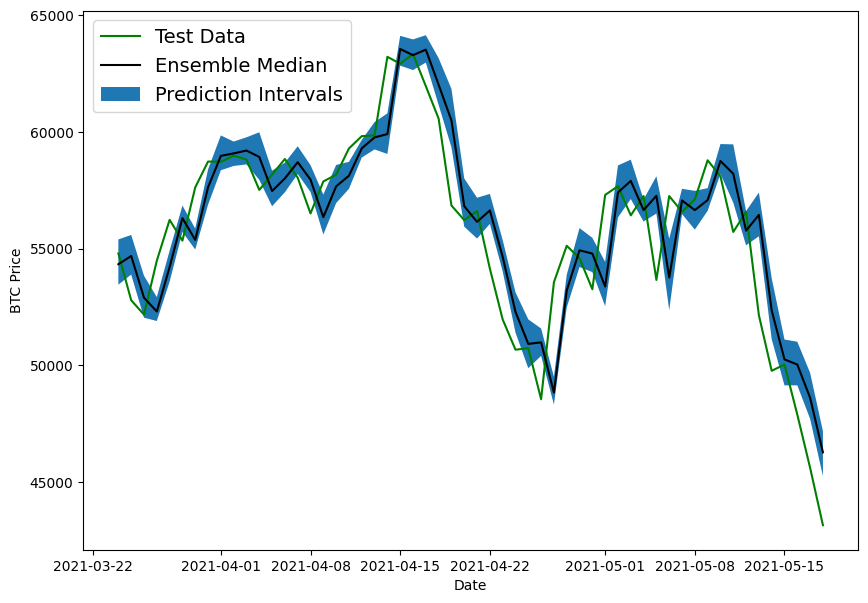

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

Az önce planladık:

* Test verileri (zemin gerçeği Bitcoin fiyatları)

* Topluluk tahminlerinin medyanı

* %95 tahmin aralıkları (verilerin Gauss/normal olduğunu varsayarsak, model zamanın %95'inin tahmin edilen değerin bu aralık arasında kalması gerektiğini söylüyor)

Yukarıdaki arsadan topluluk modeli hakkında ne söyleyebilirsiniz?

Topluluk tahminleri gerçek verilerin biraz gerisinde kalıyor gibi görünüyor.

Ve tahmin aralıkları baştan sona oldukça düşüktür.

Düşük tahmin aralıklarının yanı sıra gecikmeli tahminlerin kombinasyonu, topluluk modelimizin verilere fazla uyuyor olabileceğini gösterir, yani temel olarak naif bir modelin ne yapacağını çoğaltır ve sadece bir sonraki değer için önceki zaman adımı değerini tahmin eder.

Bu, naif tahmini geçmek için önceki girişimlerin neden beyhude olduğunu açıklayacaktır.

Geleceğe yönelik tahminlerde bulunmak ve neye benzediklerini görmek için bir model oluşturarak bu aşırı uyum hipotezini test edebiliriz.

🔑 Not: Tahmin aralıklarımız, kullandığımız verilerin bir Gauss/normal dağılımdan (çan eğrisi olarak da adlandırılır) geldiğini varsayar, ancak açık sistemler nadiren Gauss'ı takip eder. Bunu daha sonra hindi sorunu ile göreceğiz 🦃. Bu konuyla ilgili daha fazla okumak için, Nassim Nicholas Taleb'in The Black Swan'ı, özellikle Bölüm 2 ve Bölüm 15'i okumanızı tavsiye ederim. https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable

# Bir yana: iki tür belirsizlik (hindistancevizi ve metro)

Kalıtsal olarak, geleceği tahmin edemeyeceğinizi biliyorsunuz.

Bu, denemenin değerli olmadığı anlamına gelmez.

Birçok şey için, gelecek tahminleri faydalıdır. Saat 10:08'de kütüphaneye yetişmeye çalıştığınız otobüsü bilmek gibi. Saat 10:08 bir nokta tahminidir, otobüs her gün rastgele bir zamanda ayrılırsa, ne kadar yardımcı olur?

Tıpkı yarın Bitcoin'in fiyatının 50.000 USD olacağını söylemek gibi bir nokta tahminidir.

Bununla birlikte, tartıştığımız gibi, bir tahmin aralığını veya belirsizlik tahminini bilmek, bir nokta tahmininin kendisinden daha yararlı veya hatta daha yararlı olabilir.

Belirsizlik tahminleri, soruları niteliksel ve nicel olarak cevaplamaya çalışır:

* Modelim ne bilebilir? (Mükemmel verilerle, öğrenmek ne mümkün?)

* Modelim neyi bilmiyor? (Bir model asla neyi tahmin edemez?)

Makine öğreniminde farkında olmanız gereken iki tür belirsizlik vardır:

- Aleatorik belirsizlik - bu tür belirsizlik azaltılamaz, "veri" veya "metro" belirsizliği olarak da adlandırılır.

  - Diyelim ki treninizin sabah 10:08'de gelmesi planlanıyor, ancak çok nadiren tam olarak sabah 10:08'de varıyor. Trafik kötüyse, genellikle bir veya iki dakika ve belki de 10 dakikaya kadar geç olduğunu bilirsiniz. Hayal edebileceğiniz tüm verilere rağmen, bu belirsizlik seviyesi hala mevcut olacak (çoğu gürültü).

  - Tahmin aralıklarını ölçtüğümüzde, Bitcoin fiyat tahminleri için bir tür metro belirsizliği ölçüyorduk (nokta tahmininin her iki tarafı da).

- Epistemik belirsizlik - bu tür belirsizlik azaltılabilir, "model" veya "hindistancevizi" belirsizliği olarak da adlandırılır, hesaplanması çok zordur.

  - Hindistan cevizi belirsizliğinin benzetmesi, plaja giderken kafanıza bir hindistan cevizi tarafından vurulup vurulmayacağını içerir.

    - Tahmin edebileceğiniz gibi hindistancevizi ağaçlarının olduğu bir plajda olsaydınız, bunu hesaplamak çok zor olurdu. Bir hindistan cevizi bir ağacın ne sıklıkla düşer? Nerede duruyorsun?

    - Ancak hindistancevizi olmayan bir plaja giderek bu belirsizliği sıfıra indirebilirsiniz (durumunuz hakkında daha fazla veri toplayın).

  - Model belirsizliği, daha fazla veri örneği toplayarak/modellediğiniz verilerle ilgili farklı parametreleri yakalamak için bir model oluşturarak azaltılabilir.

Bunlar arasındaki çizgiler bulanıktır (bir tür belirsizlik formları diğerine dönüştürebilir) ve ilk başta kafa karıştırıcı olabilirler, ancak her türlü zaman serisi tahmini için akılda tutulması önemlidir.

Belirsizlikleri görmezden gelirseniz, gerçekten güvenilir bir tahmin alacak mısınız?

Belki başka bir örnek yardımcı olabilir.

# Flörtte belirsizlik

Flört becerilerinizi geliştirmenize yardımcı olmak için bir İlk Randevu Geri Bildirim Radyo Şovuna gittiğinizi varsayalım.

Bir kızla kör bir ilk randevuya çıktığınız yer (kızı kendi tercihinizle değiştirmekten çekinmeyin) ve radyo sunucularının tarihi kaydettiği ve ardından geliştirebileceğiniz yerin parçalarını oynattığı yer.

Ve şimdi bir bükülme ekleyelim.

Geçen hafta arkadaşın aynı gösteriye gitti. Sana tanıştıkları kızı ve konuşmanın nasıl gittiğini anlattılar.

Artık bir makine öğrenimi mühendisi olduğunuz için, ilk buluşma konuşmalarında size yardımcı olacak bir makine öğrenimi modeli oluşturmaya karar verirsiniz.

Burada hangi belirsizlik seviyelerimiz var?

Aleatory belirsizlik (veri) bakış açısından, ilk randevuların kaç konuşmasını toplarsanız toplayın, sahip olduğunuz konuşma muhtemelen diğerlerinden farklı olacaktır (en iyi konuşmaların konusu yoktur ve rastgele görünür).

Epistemik belirsizlik (model) bakış açısından, tarih gerçekten körse ve her iki taraf da şahsen buluşana kadar kimi gördüklerini bilmiyorsa, epistemik belirsizlik yüksek olacaktır. Çünkü artık tanışacağınız kişinin kim olduğu ve ne hakkında konuşabileceğiniz hakkında hiçbir fikriniz yok.

Bununla birlikte, arkadaşınız şovda geçen hafta bir randevuya çıktığı kızı söylerse ve aynı kızla randevuya çıktığınız ortaya çıkarsa, epistemik belirsizlik seviyesi azalır.

Ancak kız hakkında biraz bilgi sahibi olsanız da, konuşmanın nereye gideceğinden emin olmadığınız için aleatory belirsizliğiniz (veya metro belirsizliğiniz) hala yüksek.

Yukarıdaki senaryonun nereden geldiğini merak ediyorsanız, bu sabah başıma geldi. İyi zamanlama değil mi?

# Belirsizlik hakkında daha fazla bilgi edinmek

Makine öğreniminde belirsizlik tahminini ölçme alanı büyüyen bir araştırma alanıdır.

Daha fazla bilgi edinmek isterseniz aşağıdakileri tavsiye ederim.

📖 Kaynaklar: Makine öğrenimi/tahmindeki belirsizlik hakkında daha fazla bilgi edinebileceğiniz yerler:

- 🎥 MIT 6. S191: Kanıtsal Derin Öğrenme ve Belirsizlik https://www.youtube.com/watch?v=toTcf7tZK8c

- Wikipedia'da belirsizlik ölçümü https://en.wikipedia.org/wiki/Uncertainty_quantification#Aleatoric_and_epistemic_uncertainty

- Nate Silver'ı neden önemsemelisin? Isaac Faber'in Nassim Taleb Twitter savaşı - seçim tahmini örneğinde belirsizliğin rolü hakkında harika bir fikir. https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc

- Skander Hannachi'nin deneyimli makine öğrenimi uygulayıcılarını şaşırtan zaman serisi tahminleri hakkında 3 gerçek - insanların tahmin modelleri oluştururken, özellikle belirsizlik tahminlerini unutarak yaptıkları bazı ana hataların fantastik özeti. https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387

- Uber'de Zaman Serileri Tahmini için Sinir Ağlarında Mühendislik Belirsizliği Tahmini - Uber'in belirsizlik tahminlerini zaman sereis sinir ağlarına mühendislik yapmak için kullandığı teknikler üzerine bir tartışma. https://www.uber.com/en-TR/blog/neural-networks-uncertainty-estimation/

# Model 9: Geleceğe yönelik tahminlerde bulunmak için tüm geçmiş veriler üzerinde bir model eğitin

Geleceği tahmin etmek için kullanmasaydık, bir tahmin modelinin değeri ne olurdu?

Bitcoin'in fiyatı hakkında gelecekteki tahminlerde bulunabilecek bir model oluşturmanın zamanı geldi.

Geleceğe yönelik tahminlerde bulunmak için, tam veri kümesi üzerinde bir model eğiteceğiz ve ardından gelecekteki bir ufuk için tahminlerde bulunacağız.

Neden tam veri kümesini kullanmalısınız?

Daha önce, modelimizin sözde gelecek verileri (test seti) üzerinde nasıl çalıştığını değerlendirmek için verilerimizi eğitim ve test setlerine böldük.

Ancak bir tahmin modelinin amacı gerçek gelecek için değerleri tahmin etmek olduğundan, bir test seti kullanmayacağız.

🔑 Not: Tahmin modellerinin her tahmin yapıldığında yeniden eğitilmesi gerekir. Neden? Çünkü Bitcoin fiyatları günlük olarak güncellenirse ve yarın için fiyatı tahmin ederseniz. Modeliniz sadece bir gün için gerçekten geçerli. Yeni bir fiyat çıktığında (örneğin ertesi gün), bir sonraki tahmini tahmin etmek için bu yeni fiyatı dahil etmek için modelinizi yeniden eğitmeniz gerekecek.

Biraz veri hazırlayalım.

Mevcut durumdaki test verileri ile hangi model daha iyi bunu görmek içindi. Ama şimdi geleceği tahmin etmek için tüm veriler kullanılacak.

In [ ]:
bitcoin_prices_windowed.head()

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   

              Price+4  Price+5  Price+6  Price+7  
Date                                              
2013-10-01        NaN      NaN      NaN      NaN  
2013-10-02        NaN      NaN      NaN      NaN  
2013-10-03        NaN      NaN      NaN      NaN  
2013-10-04        NaN      NaN      NaN      NaN  
2013-10-05  123.65499      NaN      NaN      NaN

In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

Pencereler ve etiketler hazır! Bunları performans için optimize edilmiş TensorFlow Veri Kümelerine dönüştürelim:

1. tf.data.Dataset.from_tensor_slices() kullanarak X_all ve y_all'yi tensör Veri Kümelerine dönüştürme https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices

2. tf.data.Dataset.zip() kullanarak özellikleri ve etiketleri bir Veri Kümesi demetinde birleştirme https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip

3. Sırasıyla tf.data.Dataset.batch() ve tf.data.Dataset.prefetch() kullanarak verileri toplu olarak ve ön yükleme
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch

x_all[:5] ve y_all[:5] yap. Horizon 7 olduğu için ve y etiketler olduğu için birinin bittiği yerde, yani etikette sıradaki x_all başlar. Onun y_all'ı bir sonraki x_all'ın ilk değeridir.

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

Ve şimdi fazladan bir katman dışında model_1'e benzer bir model oluşturalım, aynı zamanda 100 dönem için tüm veri kümesine de sığdıracağız (burada dönem veya geri arama sayısıyla oynamaktan çekinmeyin, şimdiye kadar becerilere sahipsiniz).

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

validation data set olmadığı için aşağıdaki kodları yukarıya eklemene gerek yok.

create model alanında ], name = "model_9_future_model")

verbose = 0, callbacks = [create_model_checkpoint (model_name = model_9.name)]

# Not: Her gün, gelecekte bir gün tahmin etmek istiyorsan, bir modeli yeniden eğitmelisin.

# Gelecekle ilgili tahminlerde bulunun


Şimdiye kadar gördüğünüz gibi, makine öğrenimi modellerimiz Bitcoin'in fiyatını tahmin etmede oldukça kötü performans gösterdi (açık sistemlerde zaman serisi tahmini genellikle bir şans oyunudur), genellikle naif tahminden daha kötüdür.

Bu, geleceği tahmin etmek için modellerimizi kullanamayacağımız anlamına gelmez, değil mi?

Bunu yapmak için, gelecekte kaç zaman adımını tahmin etmek istediğimize karar veren bir INTO_FUTURE değişkeni tanımlayarak başlayalım.

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

Tahmin yapmak için oluşturmak üzere olduğumuz döngüyü temsil eden örnek akış şeması. Resimde değil: her tahmin yapıldığında ve yeni veriler elde edildiğinde bir tahmin modelini yeniden eğitmek. Örneğin, Bitcoin'in fiyatını günlük olarak tahmin ediyorsanız, her gün çalışmak için yeni bir veri noktanız olacağından, modelinizi her gün yeniden eğitmek istersiniz.

Pekala, eğitimli bir model kullanarak INTO_FUTURE tahmini değerleri döndüren bir işlev oluşturalım.

Bunu yapmak için aşağıdaki adımları oluşturacağız:

1. Giriş olarak alan işlev:

  - Değerlerin listesi (Bitcoin geçmiş verileri)

  - Eğitimli bir model (model_9 gibi)

  - Tahmin etmek için geleceğe bir pencere (INTOF_FUTURE değişkenimiz)

  - Bir modelin eğitildiği pencere boyutu (WINDOW_SIZE) - model yalnızca eğitildiği aynı tür verileri tahmin edebilir

2. Gelecekteki tahminler için boş bir liste oluşturur (bu, işlevin sonunda döndürülür) ve girdi değerlerinden son WINDOW_SIZE değerlerini çıkarır (tahminler, eğitim verilerinin son WINDOW_SIZE değerlerinden başlar)

3. Döngü INTO_FUTURE zamanları, ilk değeri kaldırmak ve en son tahmini eklemek için güncellenen WINDOW_SIZE veri kümelerinde bir tahmin yapar

  - Sonunda gelecekteki tahminler, modelin kendi önceki tahminleri kullanılarak girdi olarak yapılacaktır.

Her tahmin değerini veriye ekleyip model bir kez daha çalışıp sıradaki değeri tahmin eder.

Bir tahminde bulunun.
Bu tahmini güncellenmiş bir girdiye ekleyin.
Bunu modele geri besleyin, bir tahmin yapın, bu tahmini başka bir güncellenmiş girdiye ekleyin.
Bu nedenle, modele geri dönmek, bir tahmin yapmak, güncelleme modelini eklemek, devam etmek için güncellenmiş girdi ve
Gelecekte yapmak istediğiniz kadar çok tahminde bulunun.

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

Güzel! BitPredict 💰📈'i hayata geçirme ve Bitcoin fiyatının gelecek tahminlerini yapma zamanı.

🛠Alıştırma: Bir tahmin modeli açısından, make_future_forecasts() işlevimize başka bir yaklaşım ne olabilir? Tahmin yapmak için, her yeni bir tahmin oluşturmak istediğinizde bir modeli yeniden eğitmeniz gerektiğini hatırlayın.

Yani belki şunu deneyebilirsiniz: bir tahmin yapmak (geleceğe bir zaman adımı), verilere eklenen bu yeni tahminle bir modeli yeniden eğitmek, bir tahmin yapmak, tahmini eklemek, bir modeli yeniden eğitmek... vb.

Olduğu gibi, make_future_forecasts() işlevi, bir model parçasının yeniden eğitimini atlar.

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 83ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55552.33203125

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55552.33203125] -> Prediction: 52248.76171875

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55552.33203125 52248.76171875] -> Prediction: 48969.51953125

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55552.33203125 52248.76171875 48969.51953125] -> Prediction: 47985.73046875

1/1 [==============================] - 0s 35ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55552.33203125
 52248.76171875 48969.51953125 47985.7

In [ ]:
future_forecast[:10]

[55552.332,
 52248.76,
 48969.52,
 47985.73,
 46247.098,
 47009.887,
 47433.902,
 54665.16,
 51100.324,
 47514.973]

# Gelecek tahminlerini çizin

Bu çok heyecan verici! Tahminler yapıldı!

Ama şu anda, onlar sadece bir sayfadaki sayılar.

Veri gezgininin sloganına bağlı kalarak onları hayata geçirelim: görselleştirin, görselleştirin, görselleştirin!

Modelimizin gelecekteki tahminlerini Bitcoin'in geçmiş verilerine karşı çizmek için bir dizi gelecek tarihe ihtiyacımız olacak (veri kümemizin son tarihinden itibaren gelecek tarihler).

Belirtilen bir başlangıç tarihinden belirli bir gün sayısına (INTO_FUTURE) kadar bir tarih aralığını döndürmek için bir işlev oluşturmaya ne dersiniz?

Bunu yapmak için, NumPy'nin datetime64 veri türünün (Bitcoin tarihlerimiz zaten bu veri türündedir) ve tarih aralıkları oluşturmaya yardımcı olan NumPy'nin timedelta64 yönteminin bir kombinasyonunu kullanacağız. https://numpy.org/doc/stable/reference/arrays.datetime.html

D veri türüdür. Gün biçiminde artı bir gün.



In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

Tahmin edilen tarihlerimizin başlangıç tarihi, veri kümemizin son tarihi olacaktır.

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

Şuna bak! Artık gelecekteki Bitcoin tahminlerimizi görselleştirmek için kullanabileceğimiz tarihlerin bir listesine sahibiz.

Ancak grafiğin satırlarının bağlandığından emin olmak için (aşağıdaki hücreyi çalıştırmamayı ve ardından ne demek istediğimi görmek için verileri çizmeyi deneyin), eğitim verilerimizin son zaman adımını ve Bitcoin fiyatını next_time_steps ve future_forecast dizilerine ekleyelim.

Bu kod çalışmazsa 18'den 19'a grafikte kopuk görünüm olur.

0 --> index sırası.

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55552.332, 52248.76 , 48969.52 , 47985.73 , 46247.098,
        47009.887, 47433.902, 54665.16 , 51100.324, 47514.973, 46726.773,
        46603.01 , 48904.74 , 49926.207], dtype=float32))

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Tahminlerimiz biraz döngüsel bir model oluşturmaya başlıyor gibi görünüyor (aynı şekilde yukarı ve aşağı).

Belki de bunun nedeni, modelimizin eğitim verilerine fazla uyması ve gelecekteki veriler için iyi genelleme yapmamasıdır. Ayrıca, tahmin edebileceğiniz gibi, geleceğe ne kadar çok tahminde bulunursanız, hata şansınız o kadar yüksek olur (geleceğe 100 gün tahmin ettiğinizde ne olacağını görmeyi deneyin).

Ama elbette, bu tahminleri olduğu gibi ölçemiyoruz çünkü sonuçta, bunlar gerçek geleceğe yönelik tahminlerdir (bunu okuduğunuzda, gelecek çoktan olmuş olabilir, eğer öyleyse, model nasıl gitti?).

🔑 Not: Bir hatırlatma, burada yaptığımız tahminler finansal tavsiye değildir. Ve şimdiye kadar, zayıf makine öğrenimi modellerinin açık bir sistemde değerleri tahmin etmede ne kadar olabileceğinin farkında olmalısınız - size "piyasayı yenebilecek" bir model vaat eden herkes muhtemelen sizi dolandırmaya çalışıyor, hatalarından habersiz veya çok şanslı.

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-prediction-intervals-from-ubers-uncertainty-measures.png"

# Resmi göster
display(Image(image_url))

# Model 10: Tahmin neden BS (Hindi sorunu 🦃)

Herhangi bir tahmin oluştururken, hindi sorununu aklınızda bulundurmalısınız.

Hindi sorunu, gözlemsel verilerinizin (geçmiş verileriniz) katostrofik olan ve sizi mahvedebilecek gelecekteki bir olayı yakalayamadığı zaman bir benzetmedir.

Hikayeye göre, bir hindi 1000 gün boyunca iyi bir hayat yaşıyor, her gün besleniyor ve Şükran Günü'nden önceki akşama kadar sahipleri tarafından bakılıyor.

Hindinin gözlemsel verilerine dayanarak, işlerin olduğu gibi devam etmemesi gerektiğine inanmak için hiçbir neden yok.

Başka bir deyişle, bir hindi 1001. günde, 1000 konsektif iyi günden sonra, ideal olmaktan uzak bir gün geçirmek üzere olduğunu nasıl tahmin edebilir?

Hindi sorunu örneği. Bir hindi 1000 iyi gün yaşayabilir ve bunların hiçbiri 1001. günde ne olacağının bir işareti olmaz. Tahminle benzer şekilde, geçmiş verilerinizde gelmek üzere olan bir değişiklik belirtisi olmayabilir. Grafik görüntüsü Nassim Taleb'in The Black Swan'ın 41. sayfasından (hindi grafiklerine ekledim). https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable

Bu, Bitcoin'in fiyatını (veya açık bir piyasadaki herhangi bir hisse senedinin veya rakamın fiyatını) tahmin etmekle nasıl ilişkilidir?

Tüm varlığı için Bitcoin'in tarihsel verilerine sahip olabilir ve onu mükemmel bir şekilde tahmin eden bir model oluşturabilirsiniz.

Ama sonra bir gün bilinmeyen ve öngörülemeyen bir nedenden dolayı, Bitcoin'in fiyatı tek bir günde 100 kat düşüyor.

Tabii ki, bu tür bir senaryo pek olası değil.

Ancak bu, öneminden uzaklaşmaz.

Bunu kendi hayatınızda düşünün, birdenbire en önemli olaylar kaç kez meydana geldi?

Olduğu gibi, 10 yıl boyunca aynı kafeyi ziyaret etmesine ve daha önce bu kişiyle hiç karşılaşmamasına rağmen, bir kafeye gidebilir ve hayatınızın aşkıyla karşılaşabilirsiniz.

Aynı şey Bitcoin'in fiyatını tahmin etmek için de geçerli, 10 yıl boyunca para kazanabilir ve sonra hepsini tek bir günde kaybedebilirsiniz.

Kaç kez ödeme aldığın önemli değil, aldığın miktar önemli.

📖 Kaynak: Hindi sorunu hakkında daha fazla bilgi edinmek isterseniz, aşağıdakileri tavsiye ederim:

- Nassim Taleb tarafından hem XIV ticaretini hem de tahminin neden BS olduğunu açıklamak https://www.youtube.com/watch?v=hRwimmE2wEk

- Nassim Taleb'in Kara Kuğu'su (özellikle hindi sorununu özetleyen ve tartışan Bölüm 4) https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable

Spesifik olalım ve hindi sorununun Bitcoin'in tarihsel ve gelecekteki fiyatını modellememizi nasıl etkilediğini görelim.

Bunu yapmak için, Bitcoin'in tarihsel fiyatına oldukça olası olmayan bir veri noktası üreteceğiz, fiyat bir günde 100 kat düşüyor.

🔑 Not: Bitcoin'in fiyatının tek bir günde 100x düşmesi gibi çok olası ve öngörülemeyen bir olay (not: "olası olmayan" sıfatı, Bitcoin'in tarihsel fiyat değişikliklerine dayanmaktadır) aynı zamanda bir Kara Kuğu olayına da atıfta bulunulur. Bir Kara Kuğu olayı bilinmeyen bir bilinmeyendir, olup olmayacağını tahmin etmenin bir yolu yoktur, ancak bu tür olayların genellikle büyük bir etkisi vardır.

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

Son değerin gerçekte olduğundan 100 kat daha düşük olduğuna dikkat edin (unutmayın, bu gerçek bir veri noktası değil, sadece hindi sorununun etkilerini göstermek için).

Şimdi bir hindi sorunu veri noktası da dahil olmak üzere Bitcoin fiyatlarımız var, zaman adımlarını alalım.

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

Güzel! Yapay olarak hazırlanan hindi sorunumuz Bitcoin verilerini görelim.

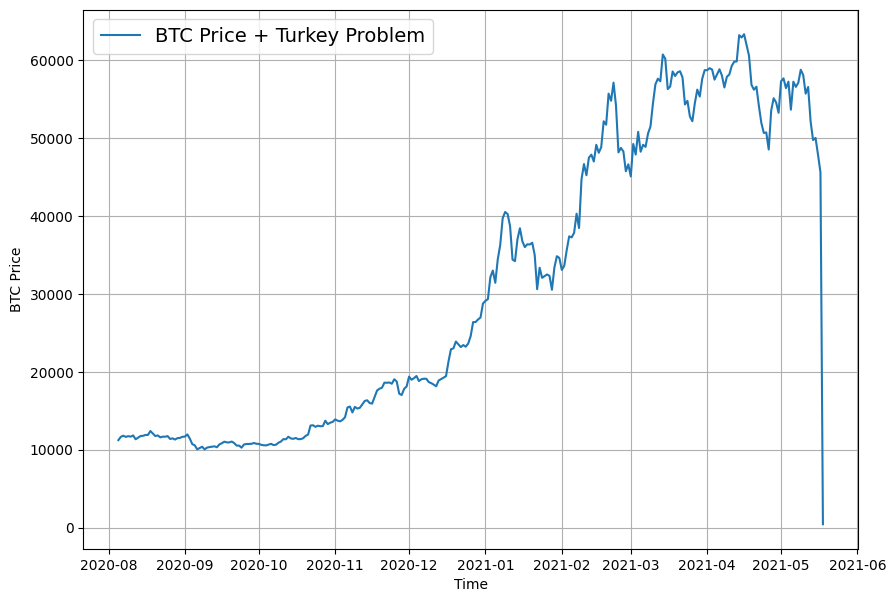

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

Bu veriler üzerinde bir model oluşturmanın nasıl gideceğini düşünüyorsunuz?

Unutmayın, değiştirdiğimiz tek şey, tüm veri kümemizden tek bir veri noktasıdır.

Bir model oluşturmadan önce, hindi verilerimizle bazı pencereli veri kümeleri oluşturalım.

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

# Bir hindi modeli oluşturma (hindi verilerini tahmin etmek için model)

Güncellenmiş verilerimizle sadece 1 değeri değiştirdik.

Bir modeli nasıl etkilediğini görelim.

Şeyleri önceki modellerle karşılaştırılabilir tutmak için, model_1'in bir klonu olan bir turkey_model oluşturacağız (aynı mimari, ancak farklı veriler).

Bu şekilde, turkey_model'i değerlendirdiğimizde sonuçlarını model_1_results ile karşılaştırabilir ve tek bir veri noktasının bir modelin performansını ne kadar etkileyebileceğini görebiliriz.

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 6ms/step - loss: 739.8215


739.8214721679688

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 638.8237


638.82373046875

Pekala, şimdi modelimizle bazı tahminlerde bulunalım ve bunları test verileri üzerinde değerlendirelim.

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8816.558 , 8763.344 , 9038.214 , 8756.084 , 8732.684 , 8721.427 ,
       8666.2295, 8509.124 , 8440.506 , 8523.213 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17126.025,
 'mse': 614144200.0,
 'rmse': 23706.59,
 'mape': 121.31091,
 'mase': 26.502583}

Ve sadece bir değer değişikliğiyle, hata metriklerimiz çatıdan geçer.

Emin olmak için, model_1'in değiştirilmemiş Bitcoin verilerine nasıl gittiğini kendimize hatırlatalım (hindi sorunu yok).

In [ ]:
model_1_results

{'mae': 564.6448,
 'mse': 1152069.1,
 'rmse': 1073.3448,
 'mape': 2.5443797,
 'mase': 0.99192446}

Sadece bir değeri değiştirerek, turkey_model MAE, model_1'e göre neredeyse 30 kat artar.

Son olarak, test hindi verileri üzerinden türkiye tahminlerini görselleştireceğiz.

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

Bu neden oluyor?

Modelimiz neden hindi sorunu veri noktasını yakalayamıyor?

Şöyle düşünün, tıpkı 1000 neşeli gün yaşayan bir hindi gibi, tek başına gözleme dayanarak, 1001 gününün sonuncusu kadar neşeli olmayacağına inanmak için hiçbir nedeni yok, Bitcoin'in tarihsel verileri üzerinde eğitilmiş bir model, fiyatın bir günde 100 kat azaldığı tek bir olayı yok, gelecekte olacağını tahmin etmek için hiçbir nedeni yok.

Bir model, eğitildiği dağıtım dışında gelecekte hiçbir şey tahmin edemez.

Buna karşılık, pek olası olmayan fiyat hareketleri (tarihsel hareketlere dayalı olarak), yukarı veya aşağı doğru muhtemelen hiçbir zaman bir tahminin parçası olmayacaktır.

Bununla birlikte, gördüğümüz gibi, beklenmedik olmalarına rağmen, bu olayların modellerimizin performansı üzerinde huuuuuuuuge etkileri olabilir.

📖 Kaynak: Black Swan olaylarını ve tarihsel olayların belirli bir dağılımdan geldiği ve gelecekteki olayların aynı dağıtımdan geleceği varsayımı nedeniyle nasıl sıklıkla göz ardı edildiklerini tartışan harika bir makale için bkz. Black Swans, Normal Distributions and Supply Chain Risk by Spend Matters.

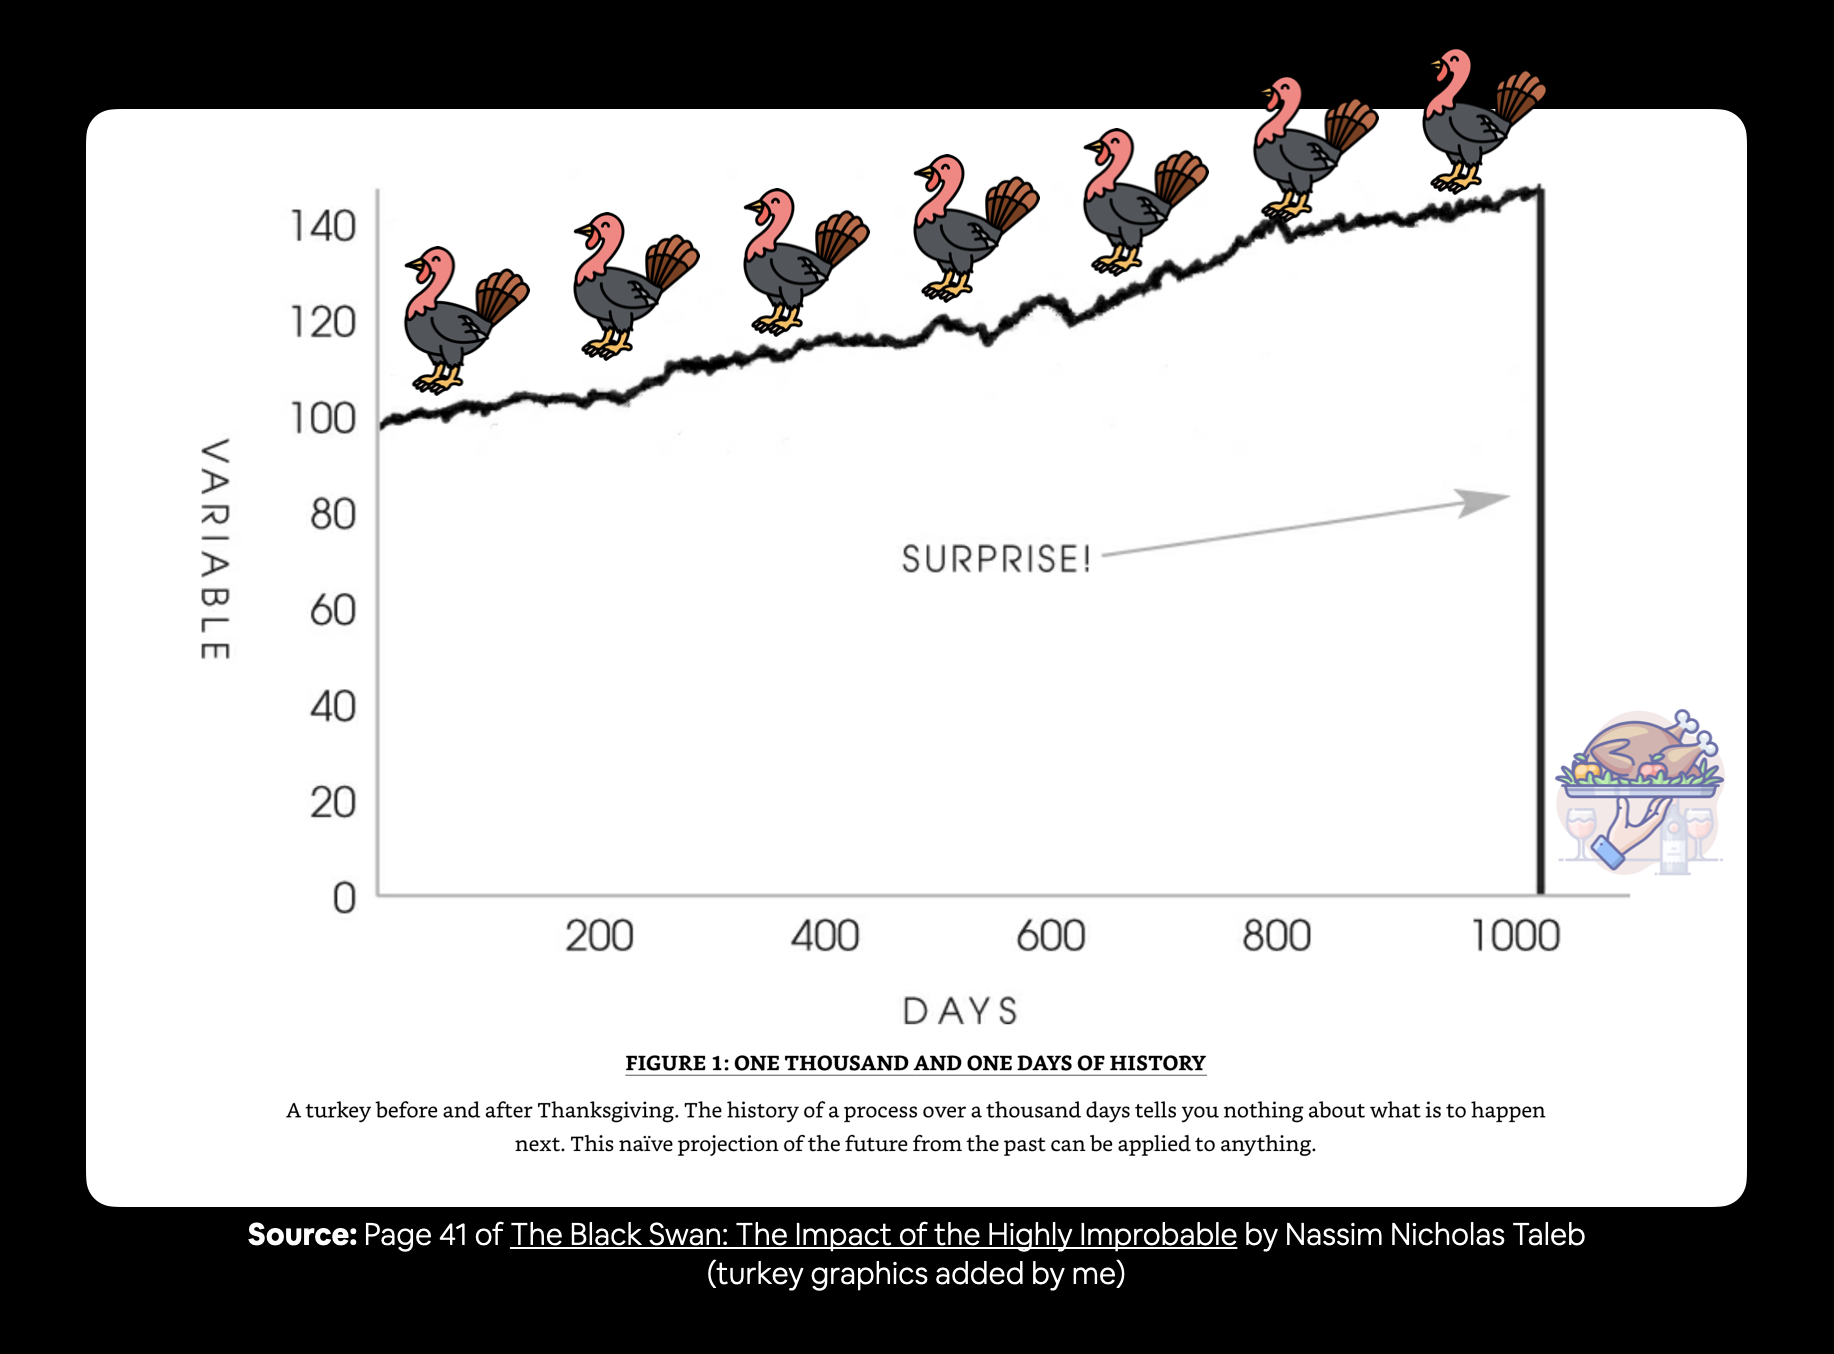

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/10-the-turkey-problem.png"

# Resmi göster
display(Image(image_url))


# Modelleri Karşılaştır

Bir sürü model eğittik.

Ve eğer bir şey varsa, makine öğrenimi ve derin öğrenme modellerinin Bitcoin'in (veya herhangi bir açık piyasa değerinin) fiyatını tahmin etmede ne kadar zayıf olduğunu gördük.

Bunu vurgulamak için, şimdiye kadar gerçekleştirdiğimiz tüm modelleme deneylerinin sonuçlarını karşılaştıralım.

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

mae           mse          rmse        mape  \
naive_model             567.980225  1.147547e+06   1071.236206    2.516525   
model_1_dense_w7_h1     564.644775  1.152069e+06   1073.344849    2.544380   
model_2_dense_w30_h1    586.024902  1.205173e+06   1097.803711    2.645588   
model_3_dense_w30_h7   1248.061035  5.525047e+06   1443.937256    5.672965   
model_4_CONV1D          571.704285  1.193942e+06   1092.676514    2.573144   
model_5_LSTM            589.134216  1.245340e+06   1115.947876    2.660074   
model_6_multivariate    565.597290  1.164764e+06   1079.242188    2.539679   
model_8_NBEATs          580.343201  1.175777e+06   1084.332520    2.670346   
model_9_ensemble        570.925903  1.152177e+06   1073.395142    2.565711   
model_10_turkey       17126.025391  6.141442e+08  23706.589844  121.310913   

                           mase  
naive_model            0.999570  
model_1_dense_w7_h1    0.991924  
model_2_dense_w30_h1   1.024377  
model_3_dense_w30_h7   2.220855  
model_4_CONV1D         1.004326  
model_5_LSTM           1.034946  
model_6_multivariate   0.993598  
model_8_NBEATs         1.019502  
model_9_ensemble       1.002959  
model_10_turkey       26.502583

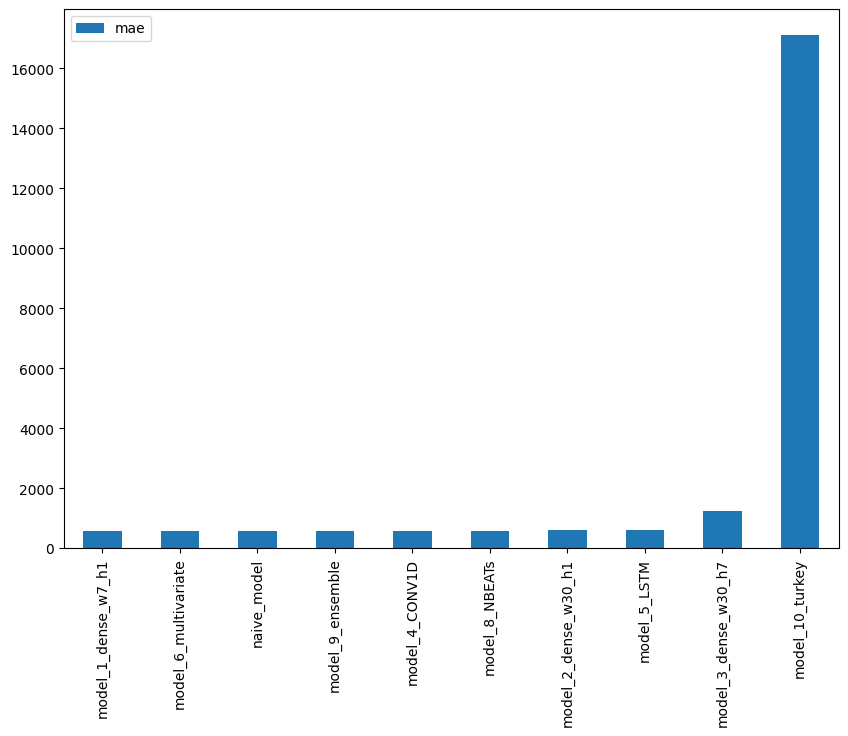

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

Derin öğrenme modellerimizin çoğu, naif modelden eşit veya sadece biraz daha iyi performans gösterir. Ve hindi modeli için tek bir veri noktasını değiştirmek performansını yok ediyor.

🔑 Not: Bir model türünün burada daha iyi performans göstermesi, başka bir yerde en iyi performansı göstereceği anlamına gelmez (ve tam tersi, bir model burada kötü performans gösterdiği için, başka bir yerde kötü performans göstereceği anlamına gelmez).

Başta da söylediğim gibi, bu finansal tavsiye değil.

Yaşadıklarımızdan sonra, artık gelecekteki herhangi bir eğitim veya blog gönderisi veya gelecekteki geleceği tahmin edebilen bir modele sahip olduğunu iddia eden yatırım satış rehberi için BS'yi adlandırmak için gereken bazı becerilere sahip olacaksınız.


Piyasayı yenmek için bir tür algoritma kullandığını iddia eden öğreticilere veya ticaret kurslarına dikkat edin (açık bir sistem), muhtemelen bir aldatmacadır veya yaratıcı çok şanslıdır ve henüz bir hindi sorunuyla karşılaşmamıştır.

Yine de bu sonuçların sizi hayal kırıklığına uğratmasına izin vermeyin, kapalı bir sistemde tahmin yapmak (elektrik talebini tahmin etmek gibi) genellikle oldukça kullanılabilir sonuçlar verir.

Bir şey varsa, bu modül anti-knowledge'ı öğretir. Tahmin yöntemlerinin genellikle açık sistemlerde iyi performans göstermediğini bilmek.

Artı, bazen geleceği bilmemek bir faydadır. Bilinen bir gelecek zaten geçmiştir.

# 🛠Alıştırmalar

1. Verileri ölçeklendirmek tek değişkenli/çok değişkenli veriler için yardımcı olur mu? (Örn. 0 ve 1 arasındaki tüm değerleri alma)

  - Bunu tek değişkenli bir model (örn. model_1) ve çok değişkenli bir model (örn. model_6) için yapmayı deneyin ve model eğitimini veya değerlendirme sonuçlarını etkileyip etkilemediğini görün.

2. Bitcoin ile ilgili en güncel verileri alın, bir modeli eğitin ve nasıl gittiğini görün (verilerimiz 18 Mayıs 2021'e kadar).

  - Bitcoin geçmiş verilerini coindesk.com/price/bitcoin adresinden ücretsiz olarak indirebilir ve "Verileri Dışa Aktar" -> "CSV"ye tıklayabilirsiniz. https://www.coindesk.com/price/bitcoin/

3. Modellerimizin çoğu için WINDOW_SIZE=7 kullandık, ancak daha iyi bir pencere boyutu var mı?

  - Daha iyi bir pencere boyutu olup olmadığını bulmak için bir dizi deney ayarlayın.

  - Örneğin, HORIZON=1 ile ancak 2-12 arasında değişen pencere boyutlarına sahip 10 farklı modeli eğitebilirsiniz.

4. Tf.keras.preprocessing.timeseries_dataset_from_array() kullanarak model_1 için kullandığımız gibi pencereli bir veri kümesi oluşturun ve yeniden oluşturulan veri kümesini kullanarak model_1'i yeniden eğitin. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

5. Çok değişkenli modelleme deneyimiz için, zaman serilerimizi çok değişkenli hale getirmek için ekstra bir özellik olarak Bitcoin blok ödül boyutunu ekledik.

  - Ekleyebileceğinizi düşündüğünüz başka özellikler var mı?

  - Eğer öyleyse, deneyin, bunlar modeli nasıl etkiler?

6. Gelecekteki tahminler için tahmin aralıkları yapın. Bunu yapmak için bir yol, tüm veriler üzerinde bir topluluk modeli eğitmek, onunla gelecekteki tahminler yapmak ve model_8 için yaptığımız gibi topluluğun tahmin aralıklarını hesaplamak olacaktır.

7. Gelecekteki tahminler için, bir tahmin yapmaya çalışın, tahminler üzerinde bir modeli yeniden eğitin, bir tahmin yapın, bir modeli yeniden eğitin, bir tahmin yapın, bir modeli yeniden eğitin, bir tahmin yapın (her yeni bir tahmin yapıldığında bir modeli yeniden eğitin). Sonuçları çizin, bir modelin her tahmin için yeniden eğitilmediği gelecekteki tahminlerle karşılaştırıldığında nasıl görünüyorlar (model_9)?

8. Bu not defteri boyunca, sadece kendi el yapımı yaptığımız algoritmaları denedik. Ancak amaca yönelik bir tahmin algoritmasının nasıl gittiğini görmeye değer.

  - Modelleme deneyleri bölümünde listelenen ekstra algoritmalardan birini deneyin, örneğin:

      - Facebook'un Kats kütüphanesi - burada birçok model var, makine öğrenimi uygulayıcısının sloganını hatırlayın: deney, deney, deney. https://github.com/facebookresearch/Kats

      - LinkedIn'in Greykite kütüphanesi https://github.com/linkedin/greykite

# 📖 Müfredat dışı

Genel olarak zaman serisi tahmini ve zaman serisi modellemesi ile yüzeyi gerçekten çizdik. Ama iyi haber şu ki, zaten çok sayıda uygulamalı kodlama deneyiminiz var.

Zaman serisinin dünyasını daha derine inmek istiyorsanız, aşağıdakileri tavsiye ederim:

- Tahmin: İlkeler ve Uygulama, zaman serisi tahminindeki en önemli kavramların çoğunu uzunca tartışan olağanüstü bir çevrimiçi ders kitabıdır. Özellikle en az Bölüm 1'i tam olarak okumanızı tavsiye ederim. https://otexts.com/fpp3/

  - En azından bölüm 1'i ve tahmin doğruluk ölçümleri bölümüne göz atmanızı kesinlikle tavsiye ederim.

- 🎥 Markus Loning'in makine öğrenimine ve zaman serilerine giriş, farklı zaman serisi problemlerinden ve bunlara nasıl yaklaşılacağından geçer. İlkeler başka yerlerde uygulanabilir olsa da, sktime kitaplığını (zaman serileri için Scikit-Learn) kullanmaya odaklanır.

- Nate Silver'ı neden önemsemelisin? Isaac Faber'in Nassim Taleb Twitter savaşı, seçim tahmini örneğinde belirsizliğin rolüne dair olağanüstü bir tartışma içgörüsüdür. https://towardsdatascience.com/why-you-should-care-about-the-nate-silver-vs-nassim-taleb-twitter-war-a581dce1f5fc

- TensorFlow zaman serisi öğreticisi - TensorFlow ile hava durumu zaman serisi verilerini tahmin etmek için TensorFlow'u kullanma eğitimi. https://www.tensorflow.org/tutorials/structured_data/time_series?hl=tr

- 📕 Nassim Nicholas Taleb'den The Black Swan - Nassim Taleb, 25 yıldır bir çukur tüccarı (kendi adına ticaret yapan bir tüccar), bu kitap ilk elden deneyimden öğrendiği derslerin çoğunu derliyor. Tahmin etme yeteneğimize dair tüm bakış açımı değiştirdi. https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable

- Skander Hannachi, Ph.D tarafından deneyimli makine öğrenimi uygulayıcılarını şaşırtan zaman serisi tahmini hakkında 3 gerçek - zaman serisi verileri diğer veri türlerinden farklıdır, daha önce başka tür makine öğrenimi sorunları üzerinde çalıştıysanız, zaman serilerine girmek bazı ayarlamalar gerektirebilir, Hannachi en yaygın 3'ünü özetliyor. https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387

- 🎥 Jordan Kern'in birinci sınıf dersleri, bunları izlemek sizi zaman serisi sorunlarıyla 0'dan 1'e götürecek:

  - Zaman Serisi Analizi - zaman serisi verileri nasıl analiz edilir. https://www.youtube.com/watch?v=Prpu_U5tKkE

  - Zaman Serisi Modellemesi - zaman serisi verilerini modellemek için farklı teknikler (çoğu derin öğrenme değil). https://www.youtube.com/watch?v=s3XH7fTHMb4